In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2025/players.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_7.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_9.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_6.csv
/kaggle/input/nfl-big-data-bowl-2025/games.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_8.csv
/kaggle/input/nfl-big-data-bowl-2025/player_play.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_4.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_3.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_5.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_1.csv
/kaggle/input/nfl-big-data-bowl-2025/plays.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv


# Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

## players.csv

## Asessing Data

In [3]:
players_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/players.csv')
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [4]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1697 non-null   int64 
 1   height       1697 non-null   object
 2   weight       1697 non-null   int64 
 3   birthDate    1210 non-null   object
 4   collegeName  1697 non-null   object
 5   position     1697 non-null   object
 6   displayName  1697 non-null   object
dtypes: int64(2), object(5)
memory usage: 92.9+ KB


In [5]:
players_df.isna().sum()

nflId            0
height           0
weight           0
birthDate      487
collegeName      0
position         0
displayName      0
dtype: int64

In [6]:
len(players_df)

1697

In [7]:
print("Duplicated data: ",players_df.duplicated().sum())

Duplicated data:  0


array([[<Axes: title={'center': 'nflId'}>,
        <Axes: title={'center': 'weight'}>]], dtype=object)

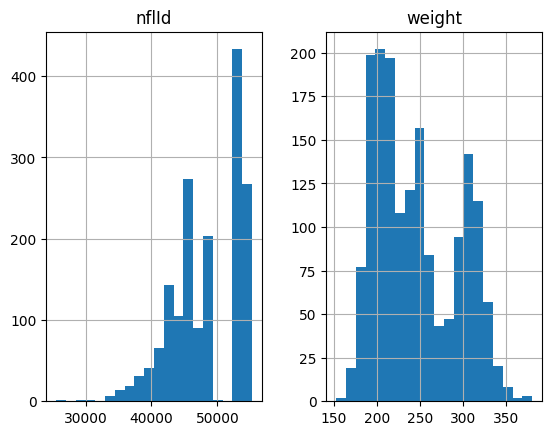

In [8]:
players_df.hist(bins=20)

**Insight:**
- 487 missing values in [birthDate] column
- There is no duplicated data
- Data type of [birthDate] is stil object
- Data type of [height] is object and stil in inchees
  

## Cleaning the data

### [birthDate]

In [9]:
players_df['birthDate'] = pd.to_datetime(players_df['birthDate'], format='mixed')
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   nflId        1697 non-null   int64         
 1   height       1697 non-null   object        
 2   weight       1697 non-null   int64         
 3   birthDate    1210 non-null   datetime64[ns]
 4   collegeName  1697 non-null   object        
 5   position     1697 non-null   object        
 6   displayName  1697 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 92.9+ KB


In [10]:
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [11]:
players_df.describe(include='all')

,nflId,height,weight,birthDate,collegeName,position,displayName
count,1697.000000,1697,1697.000000,1210,1697,1697,1697
unique,NaN,16,NaN,NaN,225,19,1687
top,NaN,6-3,NaN,NaN,Alabama,WR,Josh Jones
freq,NaN,258,NaN,NaN,59,224,2
mean,48237.157336,NaN,245.774308,1995-01-10 03:12:47.603305856,NaN,NaN,NaN
min,25511.000000,NaN,153.000000,1977-08-03 00:00:00,NaN,NaN,NaN
25%,44830.000000,NaN,205.000000,1993-06-14 06:00:00,NaN,NaN,NaN
50%,47874.000000,NaN,236.000000,1995-08-04 00:00:00,NaN,NaN,NaN
75%,53476.000000,NaN,291.000000,1997-01-14 18:00:00,NaN,NaN,NaN
max,55241.000000,NaN,380.000000,1999-11-27 00:00:00,NaN,NaN,NaN


In [12]:
x = players_df[players_df['birthDate'].isnull()]

In [13]:
len(x)

487

In [14]:
x.describe(include='all')

,nflId,height,weight,birthDate,collegeName,position,displayName
count,487.000000,487,487.000000,0,487,487,487
unique,NaN,14,NaN,NaN,140,17,485
top,NaN,6-3,NaN,NaN,Georgia,CB,Michael Carter
freq,NaN,76,NaN,NaN,19,70,2
mean,54100.681725,NaN,241.310062,NaT,NaN,NaN,NaN
min,52272.000000,NaN,153.000000,NaT,NaN,NaN,NaN
25%,53546.000000,NaN,200.000000,NaT,NaN,NaN,NaN
50%,54428.000000,NaN,230.000000,NaT,NaN,NaN,NaN
75%,54601.500000,NaN,278.000000,NaT,NaN,NaN,NaN
max,55241.000000,NaN,380.000000,NaT,NaN,NaN,NaN


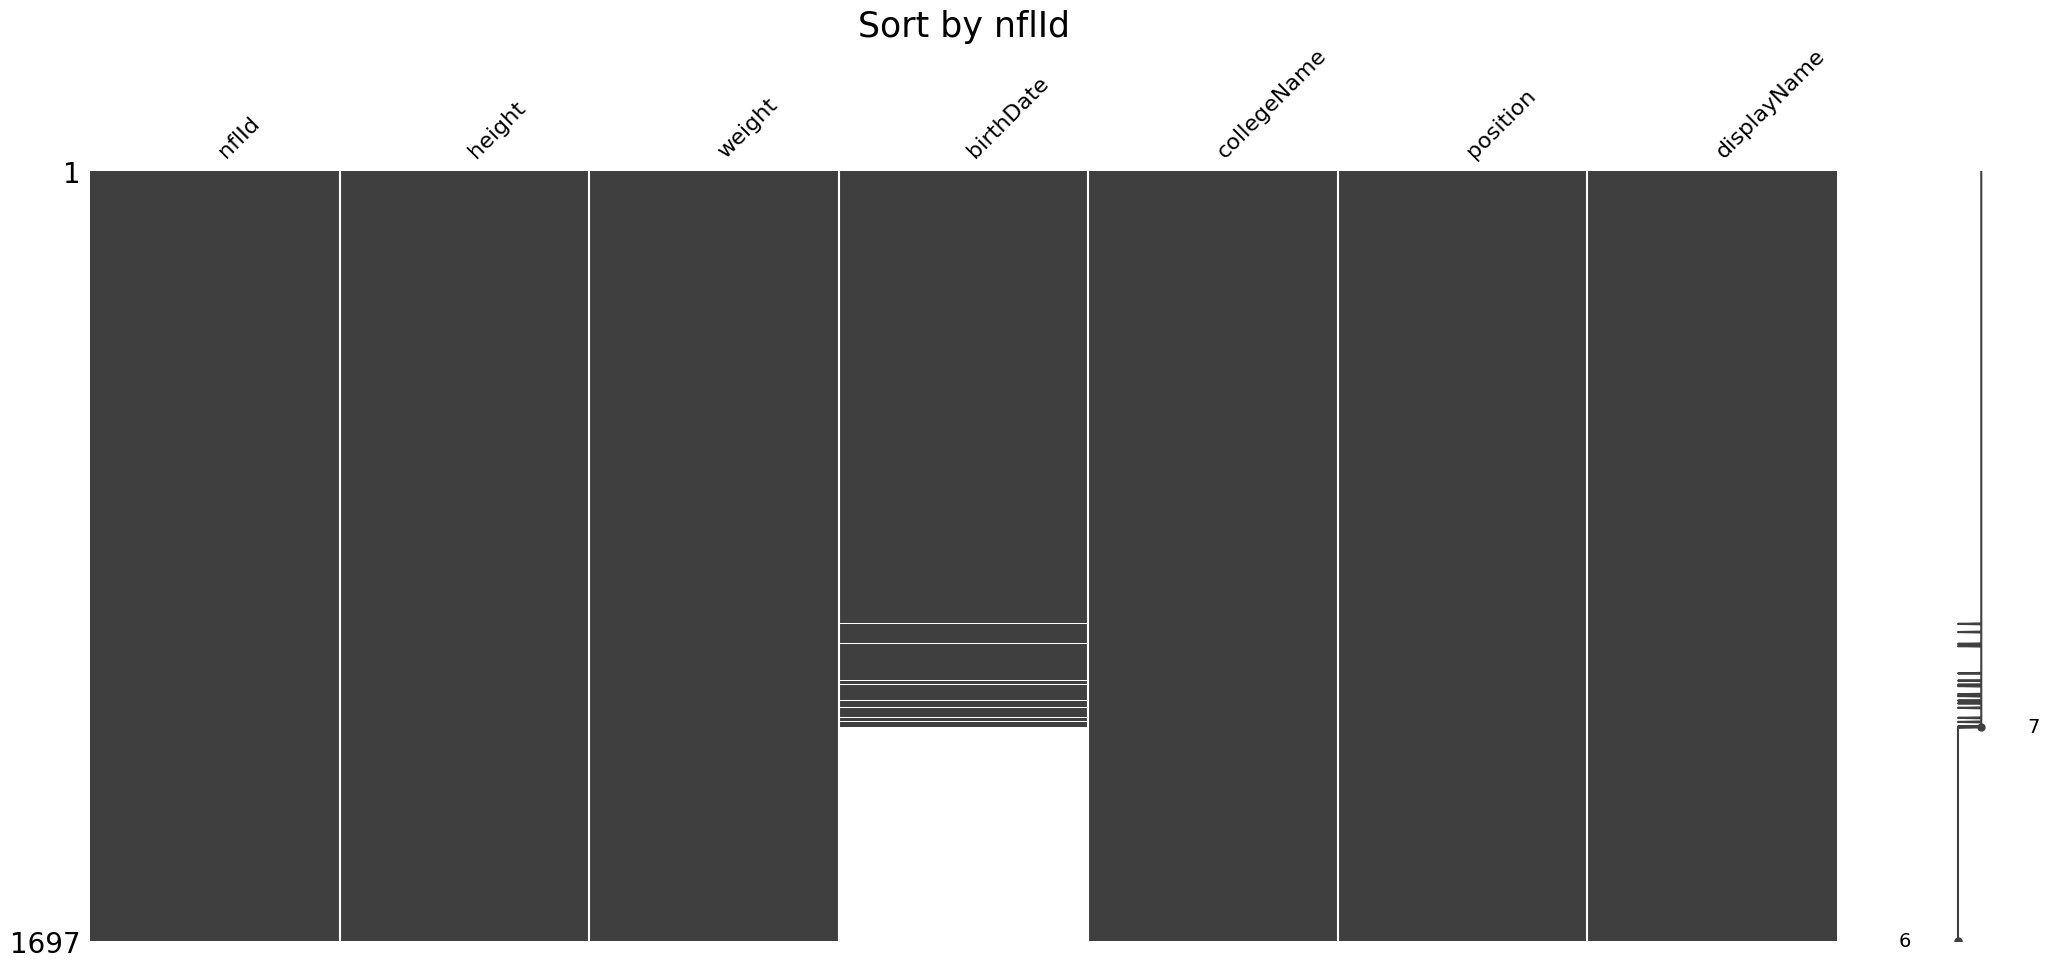

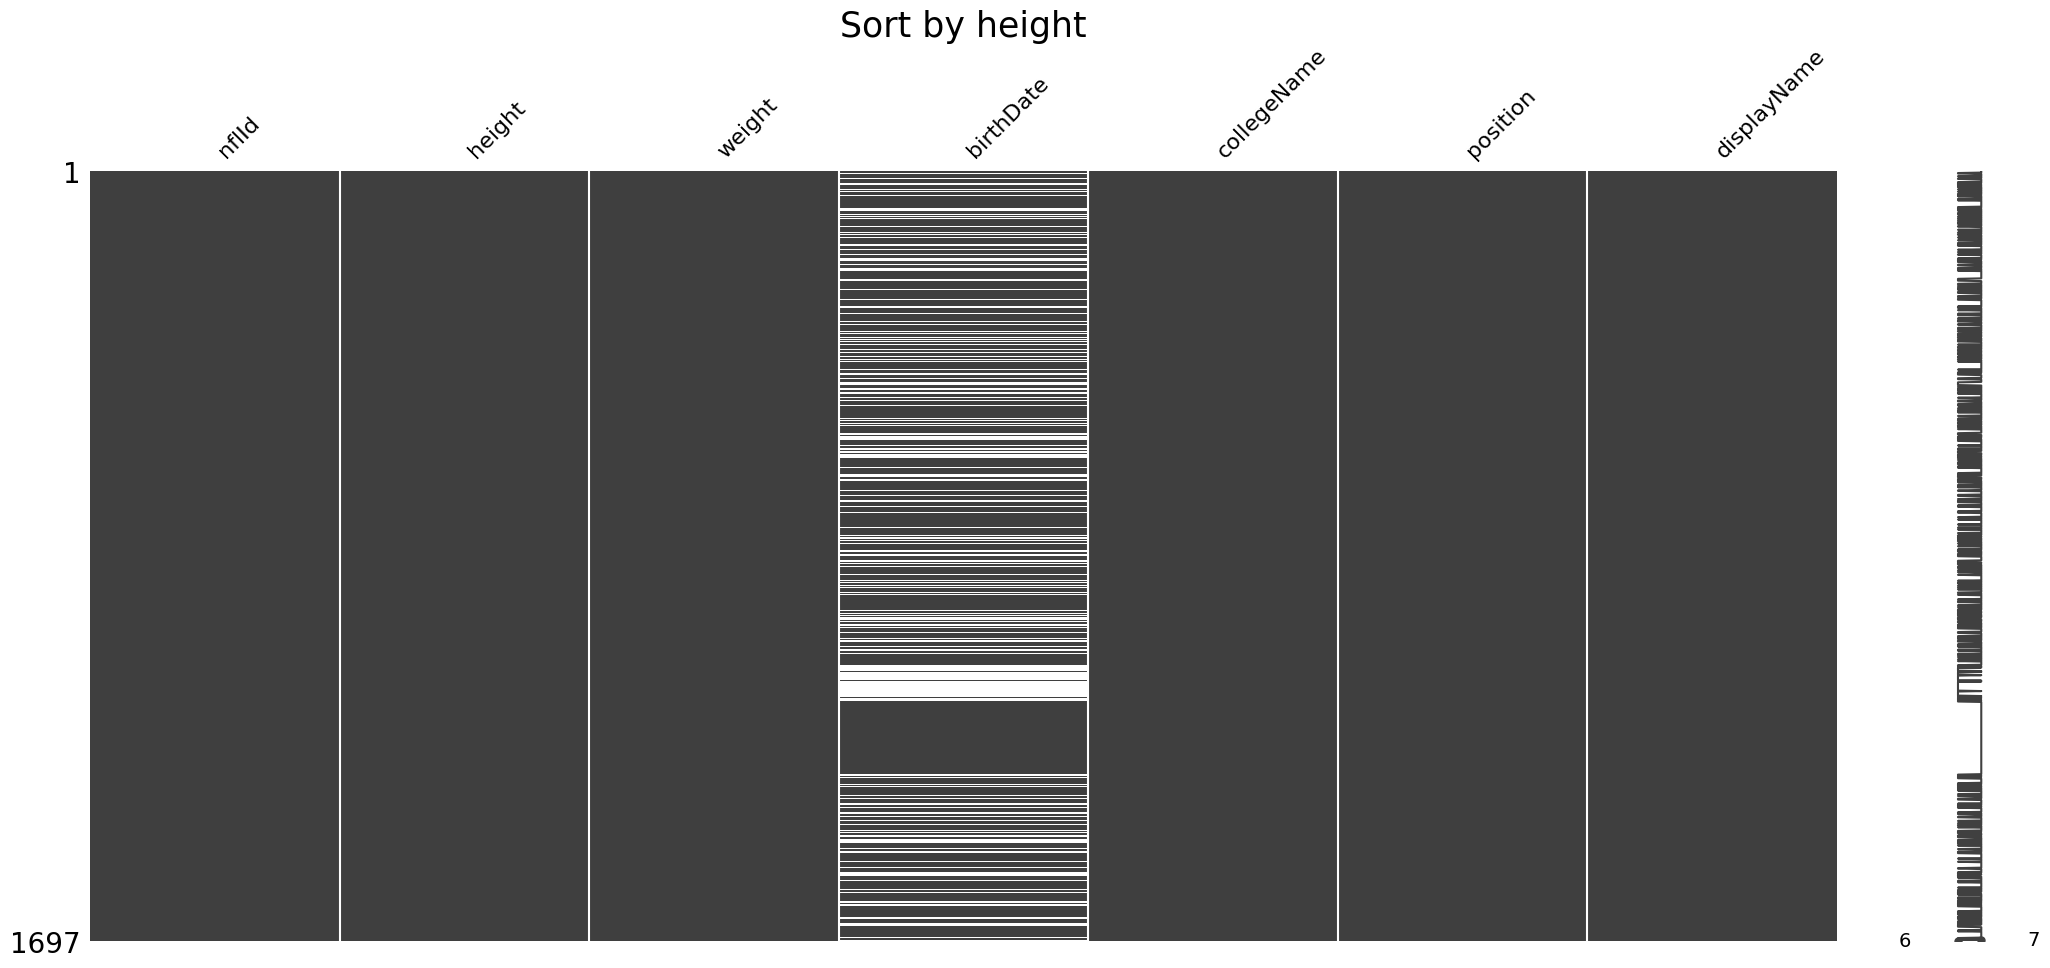

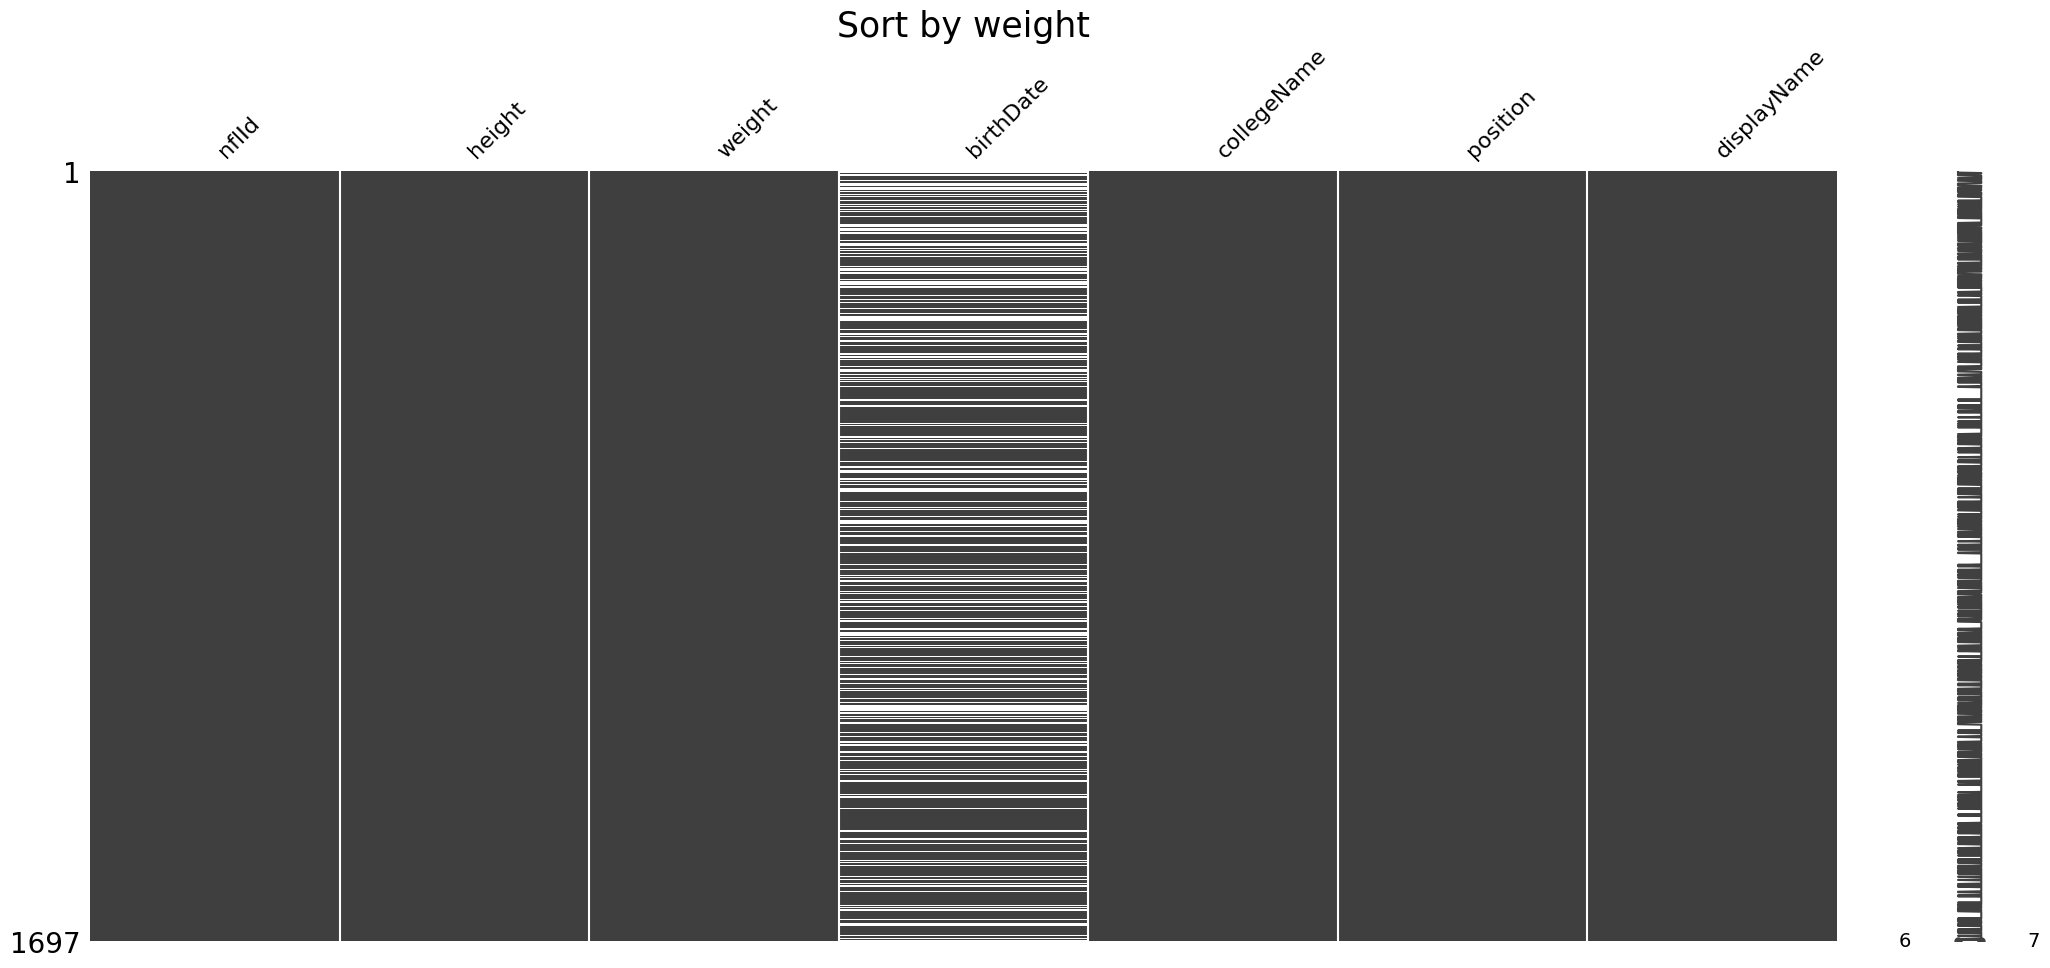

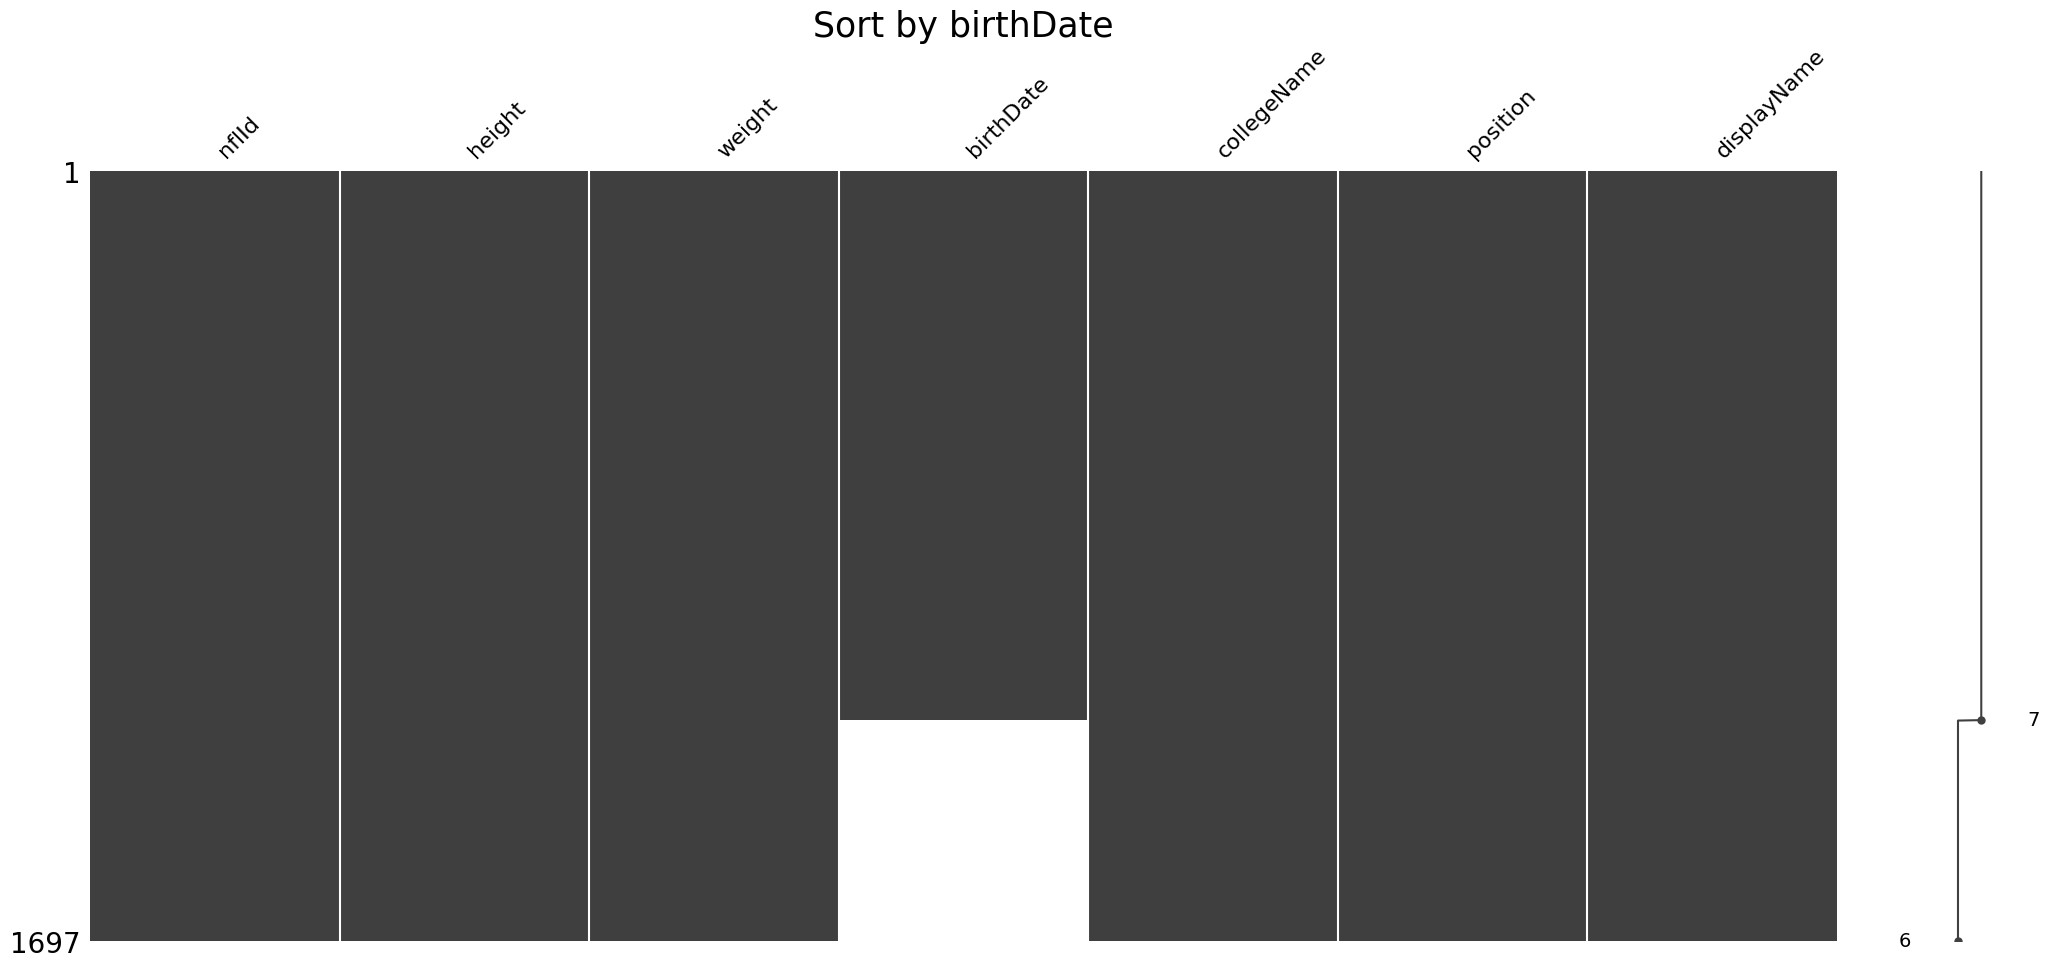

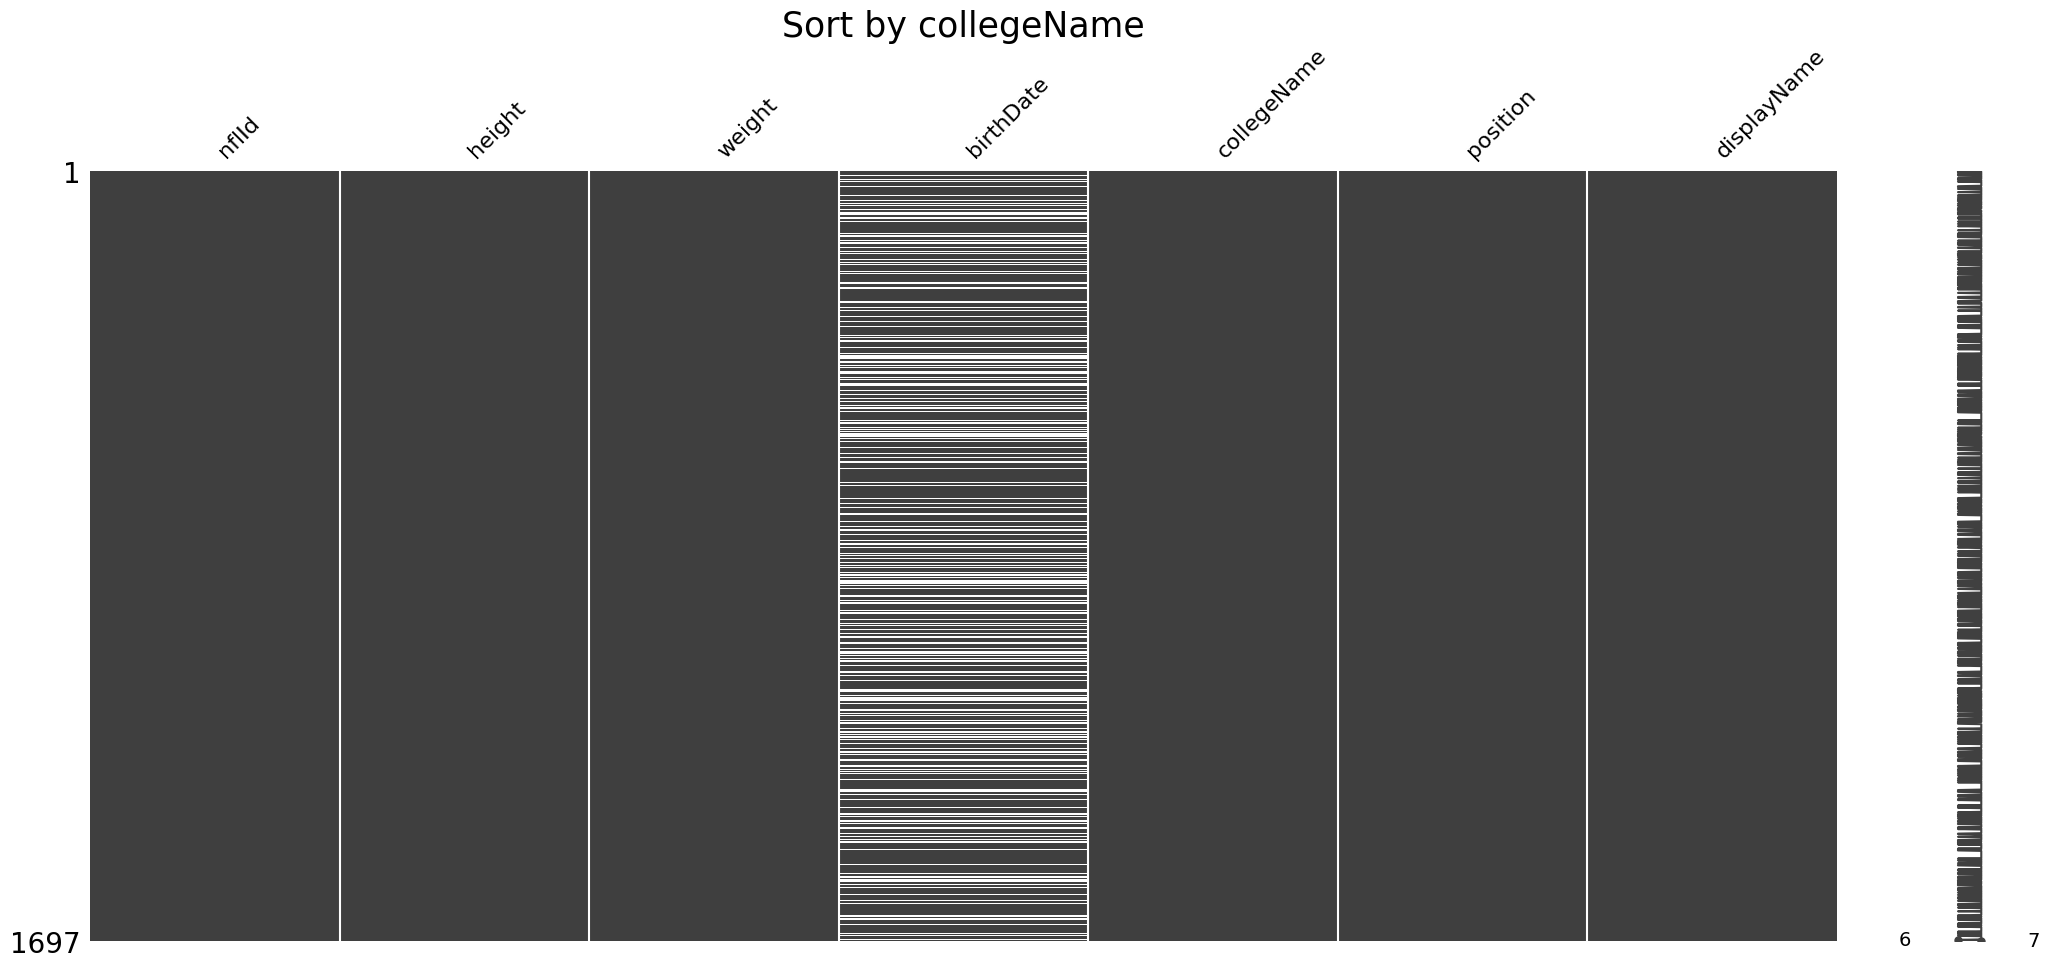

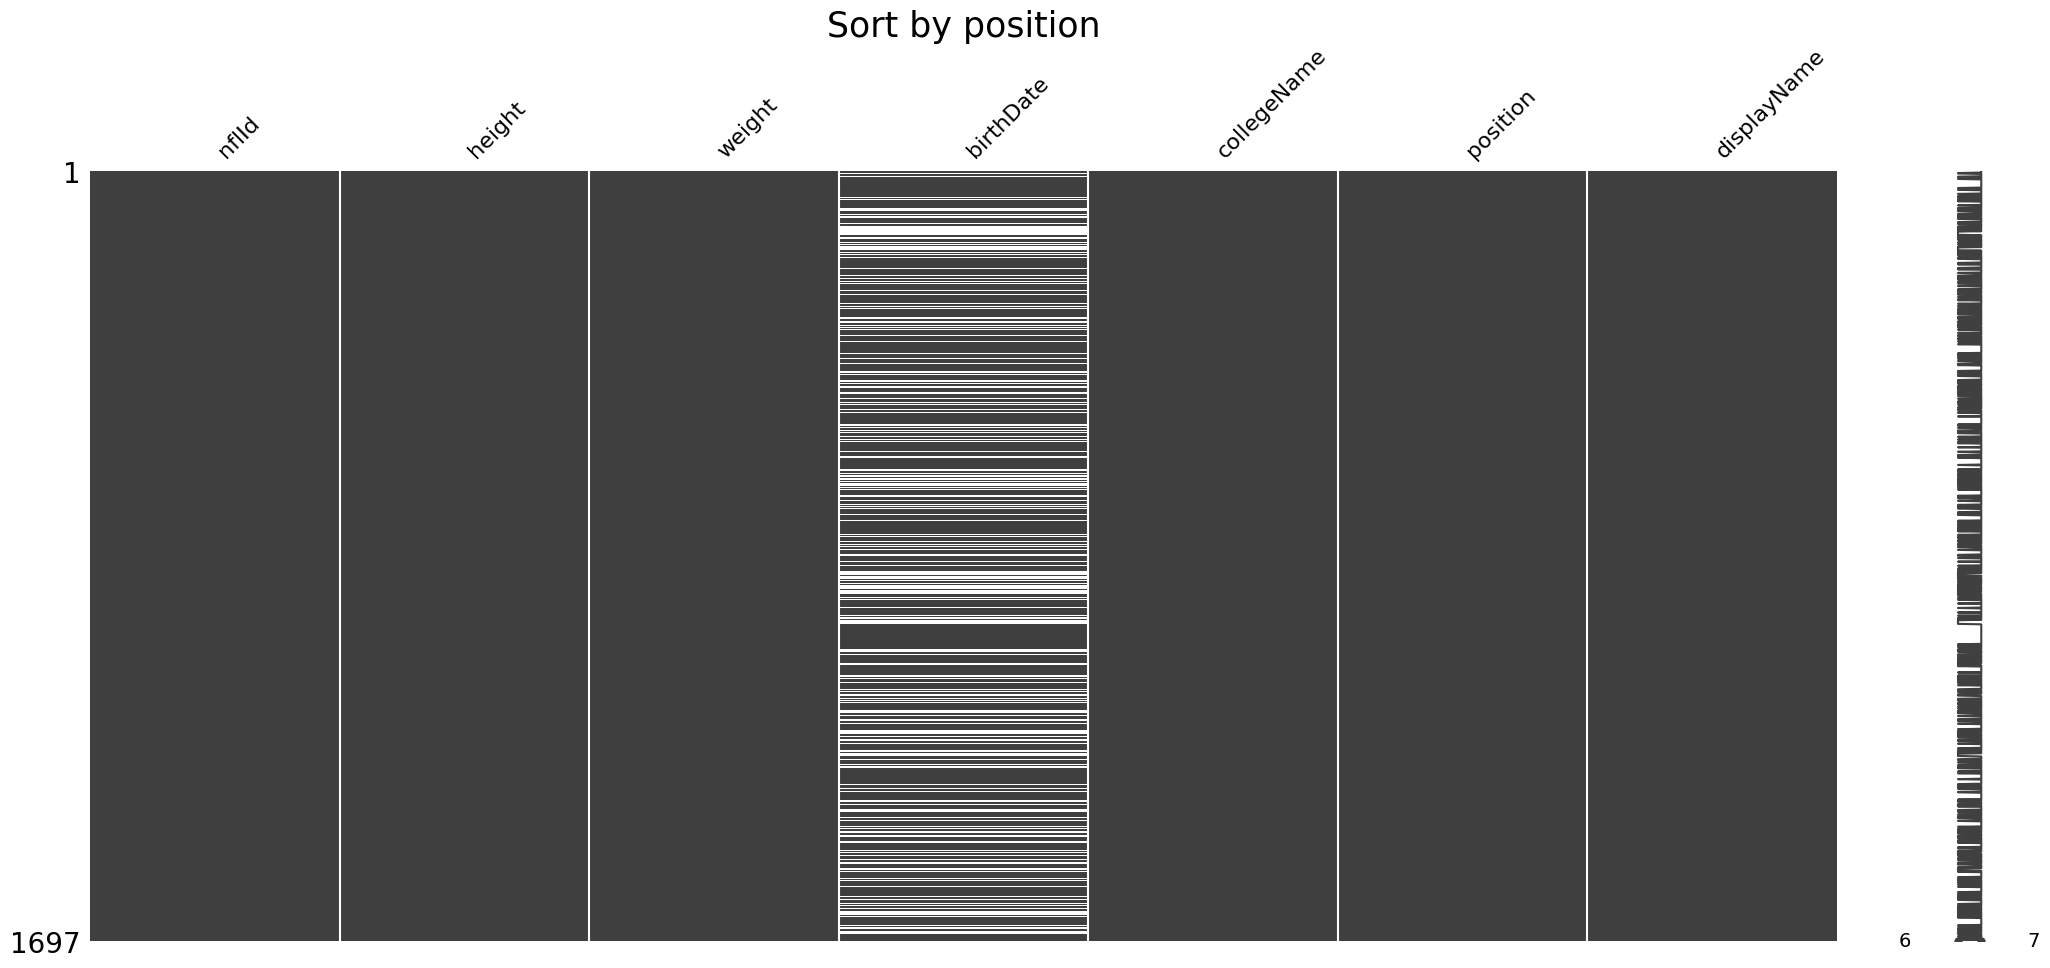

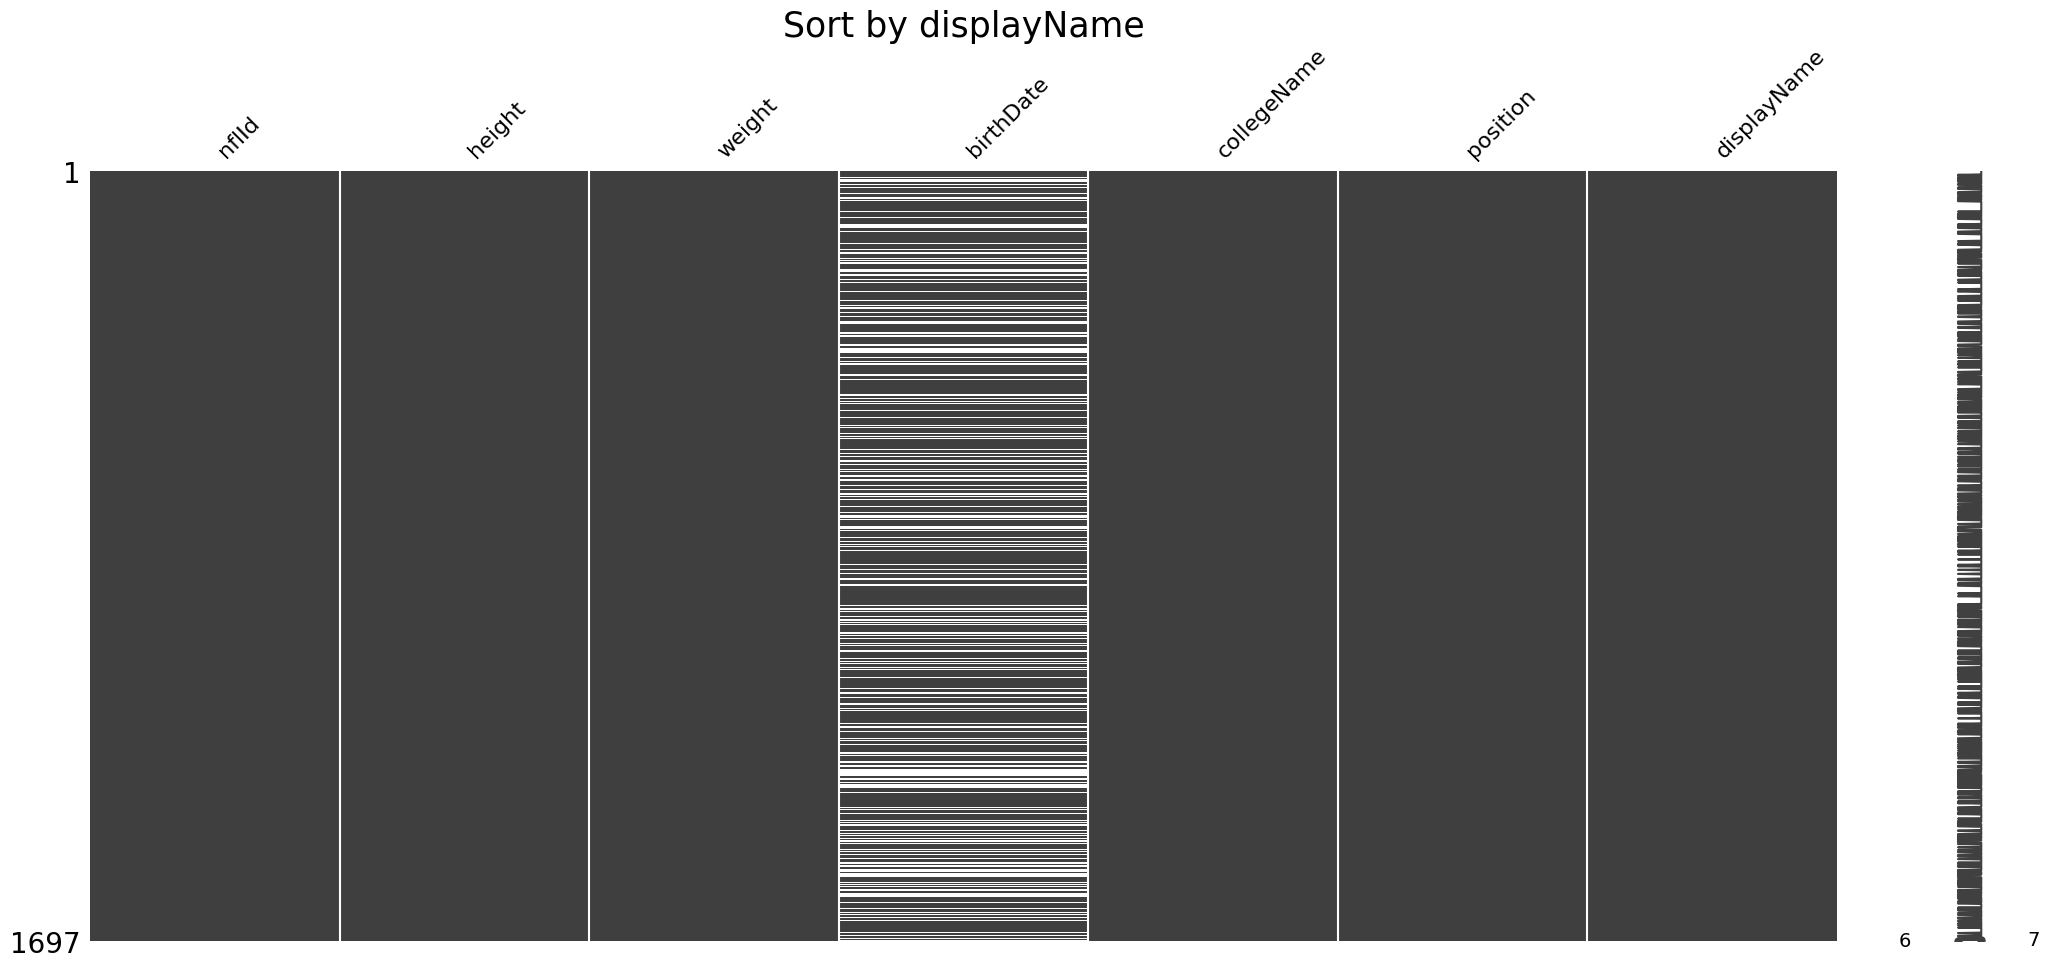

In [15]:
import missingno as msno
for columns in players_df:
    y = players_df.sort_values(by=columns, ascending=True)
    msno.matrix(y)
    plt.title(f"Sort by {columns}", fontsize=25)
    plt.show()
    

From the figure we can see that the missing value in the [birthDate] is only related to [nflId], so we can assume that the missing values happened to the newest member of the NFL. It might not influence the overall data. So the missing values can be replaced with random data that fit the mean and std previous data.

<Axes: >

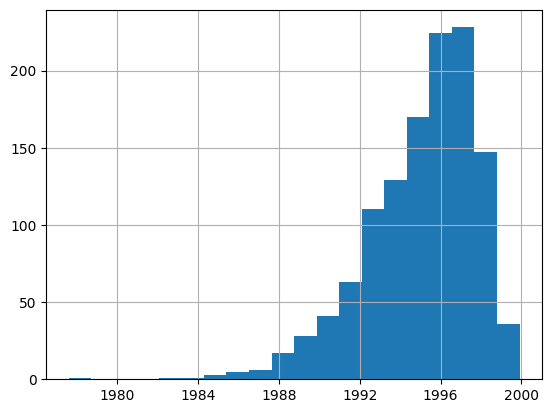

In [16]:
players_df.birthDate.hist(bins=20)

In [17]:
from datetime import datetime
# Make age column
now = datetime.now()
players_df['age'] = (now - players_df['birthDate']).dt.days

# Calculate mean and std of the age
mean_days = players_df['age'].mean()
std_days = players_df['age'].std()

# Step 3: Generate random days based on mean and std for NaT values
np.random.seed(42)  # For reproducibility

for idx, row in players_df.iterrows():
    if pd.isna(row['birthDate']):
        # Generate random day number from a normal distribution
        random_day = np.random.normal(mean_days, std_days)
        # Clip the value to make sure it's within a valid range
        random_day = np.clip(random_day, (players_df['age'].min()), (players_df['age'].max()))
        # Convert back to datetime
        random_date = now - pd.to_timedelta(random_day, unit='D')
        players_df.at[idx, 'birthDate'] = random_date



In [18]:
players_df['age'] = (now - players_df['birthDate']).dt.days
players_df['age'] = players_df['age']/365

<Axes: >

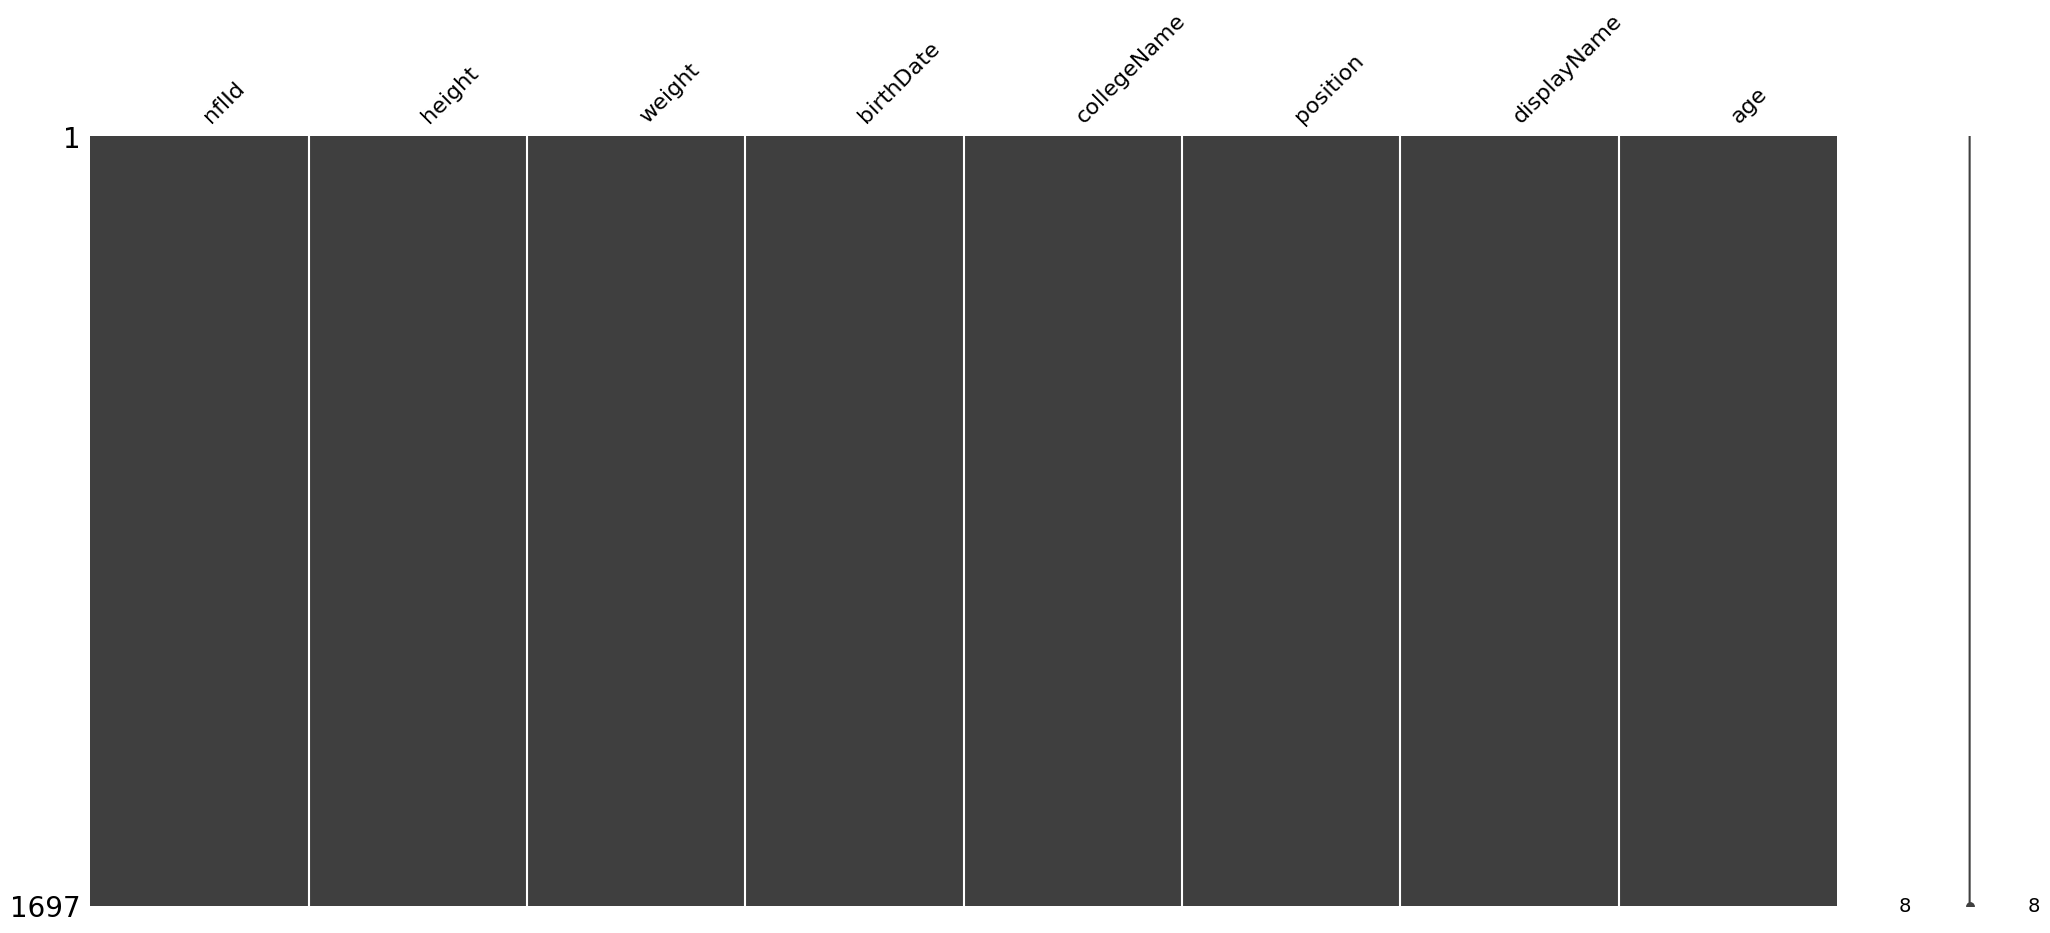

In [19]:
msno.matrix(players_df)

<Axes: >

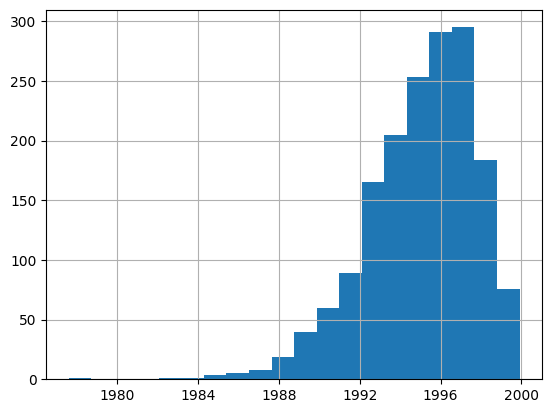

In [20]:
players_df.birthDate.hist(bins=20)

<Axes: >

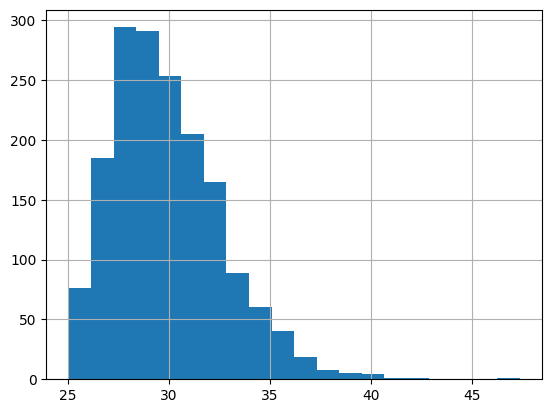

In [21]:
players_df.age.hist(bins=20)

In [22]:
players_df.age.describe()

count    1697.000000
mean       29.924134
std         2.728238
min        25.030137
25%        27.926027
50%        29.504110
75%        31.556164
max        47.361644
Name: age, dtype: float64

### [height]

In [23]:
players_df.height.describe()

count     1697
unique      16
top        6-3
freq       258
Name: height, dtype: object

In [24]:
def feet_inches_to_cm(height):
    feet, inches = map(int, height.split('-'))  # Split height into feet and inches
    total_inches = feet * 12 + inches  # Convert to total inches
    return total_inches * 2.54  # Convert inches to cm

# Apply the conversion function to the DataFrame
#df["Height_cm"] = df["Height"].apply(feet_inches_to_cm)
players_df['heightCm'] = players_df['height'].apply(feet_inches_to_cm)

## Exploring the data

**Question heightCm**:
* Top 5 highest and lowest players
* demographic by height cluster

**Question weight**:
* 5 top and bottom weight player
* Demographic by weight cluster

**Question collegeName**:
* College with top and bottom number of NFL player

**Question position**:
* demographic position players

**Question age**:
* demographic player by age cluster
* 5 oldest and youngest player

**Analysis question**:
* Pemain-peman tinggi kebanyakan berasal dari kampus mana?
* corelation of each columns and dig insight from that

### heightCm

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster centers : [[195.62633499]
 [188.18734568]
 [179.73632287]]


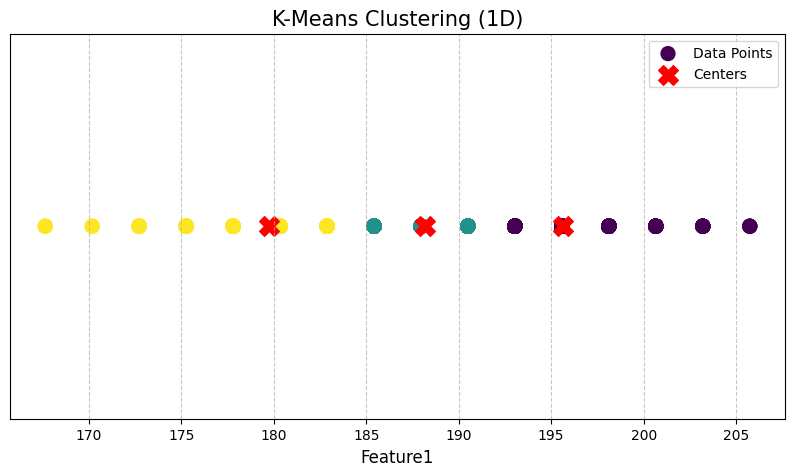

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=3, random_state=42)

players_df['height_cluster'] = kmeans.fit_predict(players_df[['heightCm']])

centers = kmeans.cluster_centers_

print(f"cluster centers : {centers}")

plt.figure(figsize=(10, 5))
plt.scatter(players_df['heightCm'], [0] * len(players_df), c=players_df['height_cluster'], cmap='viridis', label='Data Points', s=100)
plt.scatter(centers, [0] * len(centers), c='red', marker='X', label='Centers', s=200)
plt.title('K-Means Clustering (1D)', fontsize=15)
plt.xlabel('Feature1', fontsize=12)
plt.yticks([])  # Remove y-axis ticks as it's a 1D visualization
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [26]:
players_df['height_cluster'] = players_df['height_cluster'].apply(
    lambda x: '193.04-205.74' if x == 0 else '185.42-190.50' if x == 1 else '167.64-182.88'
)    

In [27]:
height_cluster_df = players_df.groupby(by='height_cluster').agg({
    'heightCm': ['count', 'min', 'max']   
})
height_cluster_df= height_cluster_df['heightCm'].reset_index()

In [28]:
height_cluster_df

,height_cluster,count,min,max
0,167.64-182.88,446,167.64,182.88
1,185.42-190.50,648,185.42,190.50
2,193.04-205.74,603,193.04,205.74


In [29]:
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,age,heightCm,height_cluster
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,47.361644,193.04,193.04-205.74
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,42.887671,193.04,193.04-205.74
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,41.027397,187.96,185.42-190.50
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis,40.564384,198.12,193.04-205.74
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan,39.569863,193.04,193.04-205.74


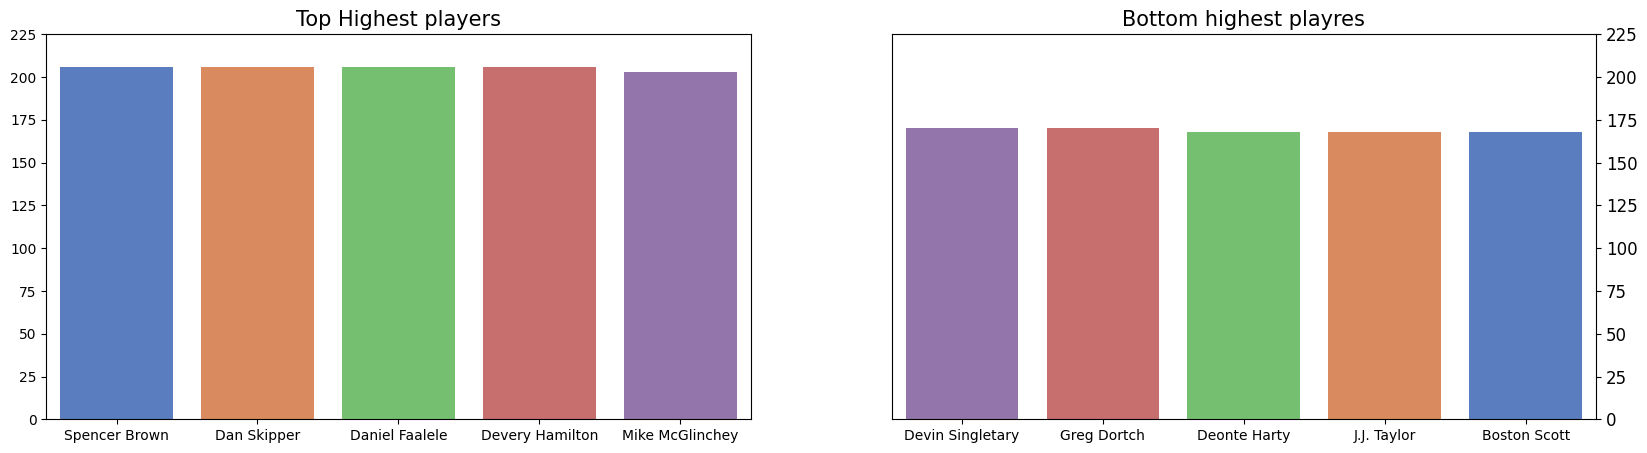

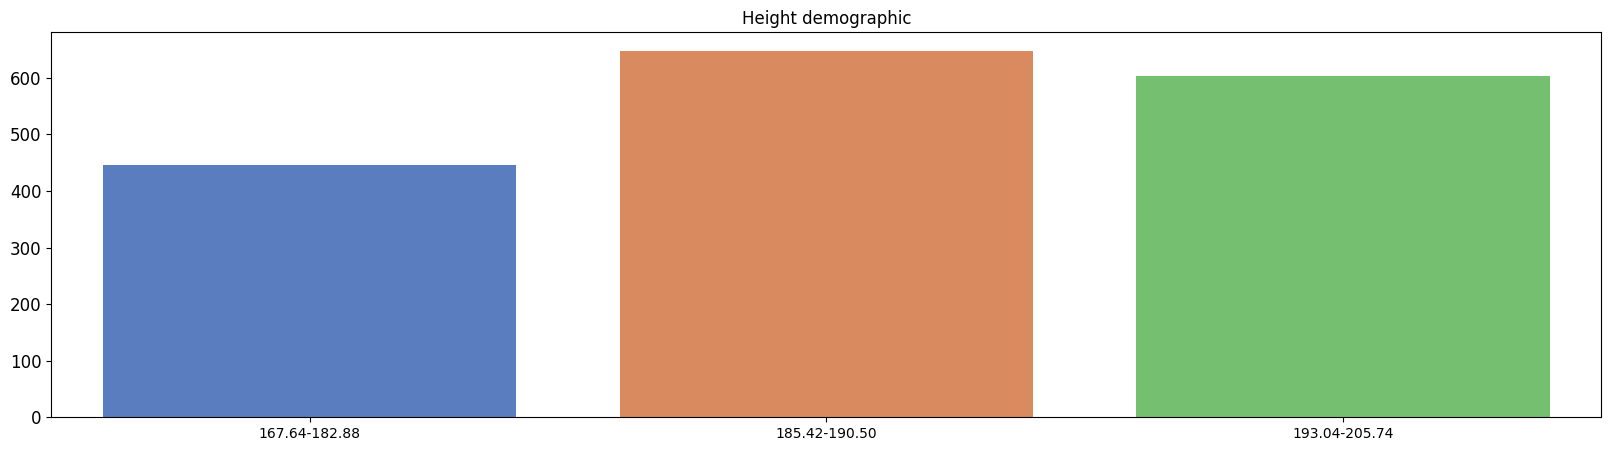

In [30]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x='displayName', y='heightCm', data=players_df.sort_values(by='heightCm', ascending=False).head(5), palette='muted', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Top Highest players', loc='center', fontsize=15)
ax[0].set_ylim(0, 225)
ax[0].tick_params(axis ='y', labelsize=10)

sns.barplot(x='displayName', y='heightCm', data=players_df.sort_values(by='heightCm', ascending=True).head(5), palette='muted', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_ylim(0, 225)
ax[1].set_title('Bottom highest playres', loc='center', fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
fig.savefig('fig1.png')

fig, ax =plt.subplots(figsize=(20, 5))
sns.barplot(x='height_cluster', y='count', data=height_cluster_df.sort_values(by='height_cluster', ascending=1), palette='muted', ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Height demographic")
ax.tick_params(axis='y', labelsize=12)
plt.show()

fig.savefig('fig2.png')

**Question heightCm**:
* Top 5 highest and lowest players
* demographic by height cluster

### weight

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster centers : [[200.96061885]
 [310.22839506]
 [246.85      ]]


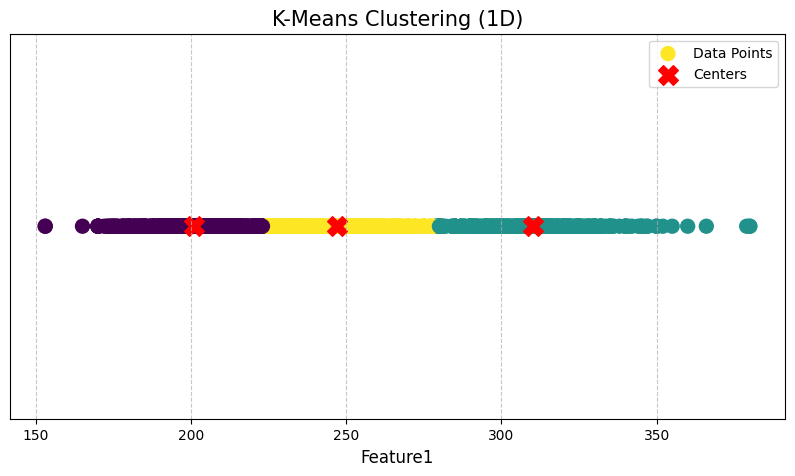

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=3, random_state=42)

players_df['weight_cluster'] = kmeans.fit_predict(players_df[['weight']])

centers = kmeans.cluster_centers_

print(f"cluster centers : {centers}")

plt.figure(figsize=(10, 5))
plt.scatter(players_df['weight'], [0] * len(players_df), c=players_df['weight_cluster'], cmap='viridis', label='Data Points', s=100)
plt.scatter(centers, [0] * len(centers), c='red', marker='X', label='Centers', s=200)
plt.title('K-Means Clustering (1D)', fontsize=15)
plt.xlabel('Feature1', fontsize=12)
plt.yticks([])  # Remove y-axis ticks as it's a 1D visualization
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [32]:
players_df['weight_cluster'] = players_df['weight_cluster'].apply(
    lambda x: '153-223' if x == 0 else '279-380' if x == 1 else '224-278'
)  

In [33]:
weight_cluster_df = players_df.groupby(by='weight_cluster').agg({
    'weight': ['count', 'min', 'max']   
})
weight_cluster_df= weight_cluster_df['weight'].reset_index()

In [34]:
weight_cluster_df

,weight_cluster,count,min,max
0,153-223,711,153,223
1,224-278,500,224,278
2,279-380,486,279,380


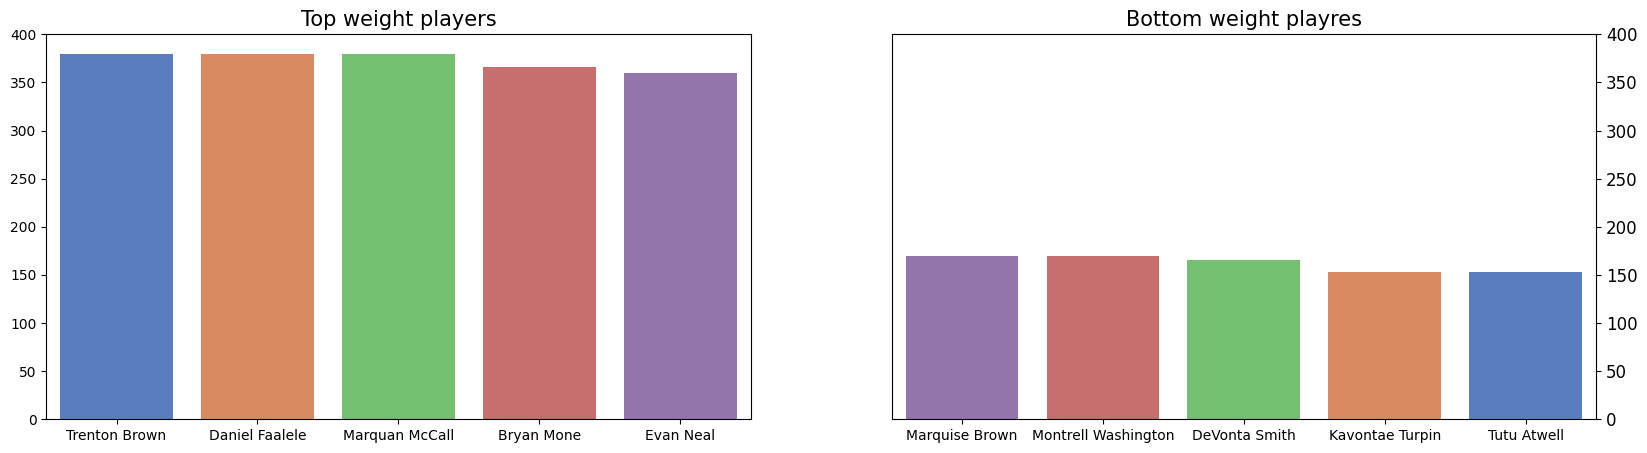

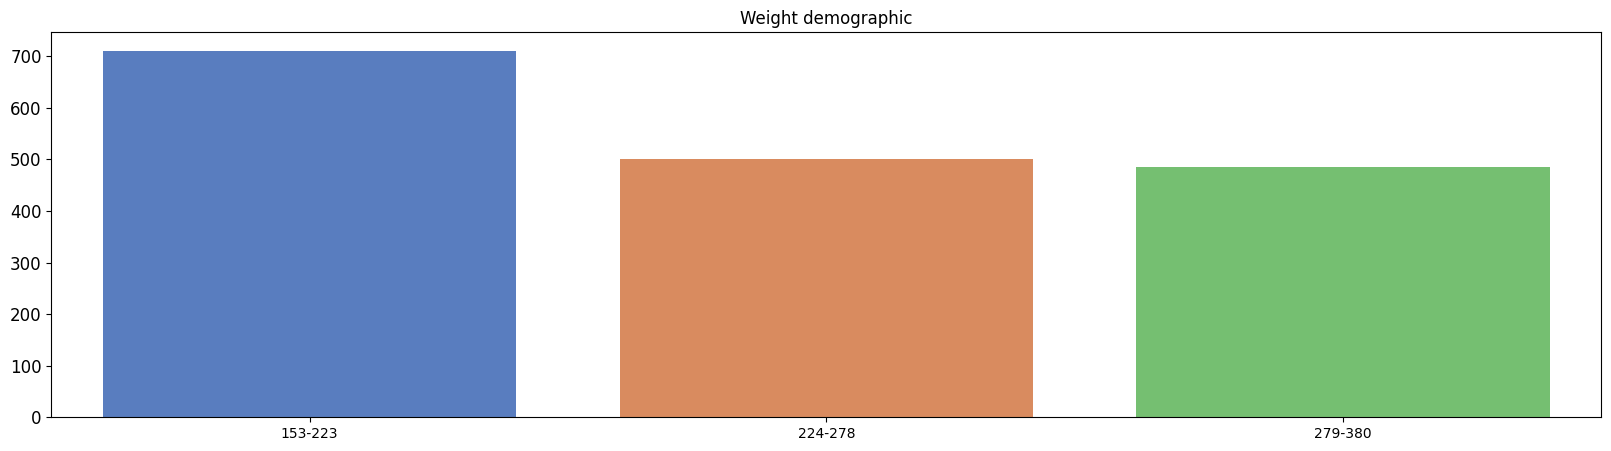

In [35]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x='displayName', y='weight', data=players_df.sort_values(by='weight', ascending=False).head(5), palette='muted', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Top weight players', loc='center', fontsize=15)
ax[0].set_ylim(0, 400)
ax[0].tick_params(axis ='y', labelsize=10)

sns.barplot(x='displayName', y='weight', data=players_df.sort_values(by='weight', ascending=True).head(5), palette='muted', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_ylim(0, 400)
ax[1].set_title('Bottom weight playres', loc='center', fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
fig.savefig('fig3.png')

fig, ax =plt.subplots(figsize=(20, 5))
sns.barplot(x='weight_cluster', y='count', data=weight_cluster_df.sort_values(by='weight_cluster', ascending=1), palette='muted', ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Weight demographic")
ax.tick_params(axis='y', labelsize=12)
plt.show()
fig.savefig('fig4.png')

**Question weight**:
* 5 top and bottom weight player
* Demographic by weight cluster

### collageName

In [36]:
collageName_df = players_df.groupby(by='collegeName').nflId.nunique().sort_values(ascending=0).reset_index()
collageName_df.rename(columns={
    'nflId':'player'
}, inplace=True)
collageName_df.head()

,collegeName,player
0,Alabama,59
1,Louisiana State,49
2,Ohio State,49
3,Georgia,41
4,Michigan,35


In [37]:
len(collageName_df['player'] == 1)

225

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster centers : [[13.27586207]
 [ 2.37333333]
 [33.58823529]]


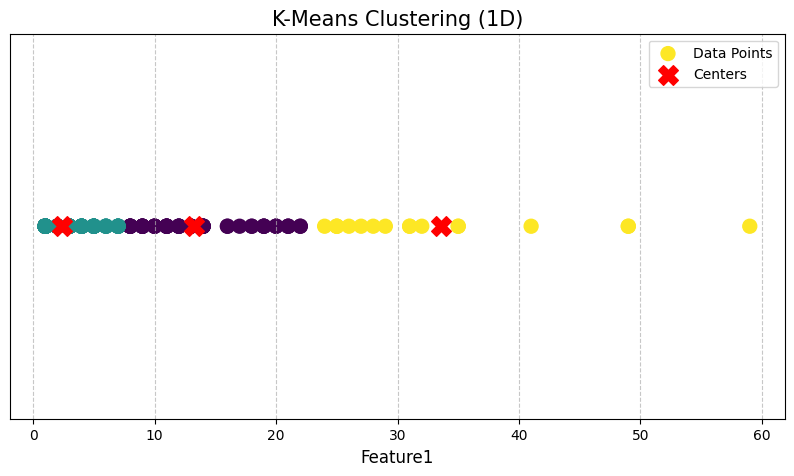

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=3, random_state=42)

collageName_df['cluster'] = kmeans.fit_predict(collageName_df[['player']])

centers = kmeans.cluster_centers_

print(f"cluster centers : {centers}")

plt.figure(figsize=(10, 5))
plt.scatter(collageName_df['player'], [0] * len(collageName_df), c=collageName_df['cluster'], cmap='viridis', label='Data Points', s=100)
plt.scatter(centers, [0] * len(centers), c='red', marker='X', label='Centers', s=200)
plt.title('K-Means Clustering (1D)', fontsize=15)
plt.xlabel('Feature1', fontsize=12)
plt.yticks([])  # Remove y-axis ticks as it's a 1D visualization
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [39]:
collageName_df.groupby(by='cluster').agg({
    'player': ['min', 'max', 'count']
})

player          
           min max count
cluster                 
0            8  22    58
1            1   7   150
2           24  59    17

In [40]:
collageName_df['cluster'] = collageName_df['cluster'].apply(
    lambda x: 'low(1-7)' if x == 1 else 'mid(8-22)' if x== 0 else 'high(24-59)'
)
collageName_df

,collegeName,player,cluster
0,Alabama,59,high(24-59)
1,Louisiana State,49,high(24-59)
2,Ohio State,49,high(24-59)
3,Georgia,41,high(24-59)
4,Michigan,35,high(24-59)
...,...,...,...
220,Kentucky Wesleyan,1,low(1-7)
221,Kutztown,1,low(1-7)
222,Southern Arkansas,1,low(1-7)
223,Southeast Missouri,1,low(1-7)


In [41]:
cluster_collageName_df = collageName_df.groupby(by='cluster').agg({
    'player': ['min', 'max', 'count']
})
cluster_collageName_df= cluster_collageName_df['player'].reset_index()

cluster_collageName_df

,cluster,min,max,count
0,high(24-59),24,59,17
1,low(1-7),1,7,150
2,mid(8-22),8,22,58


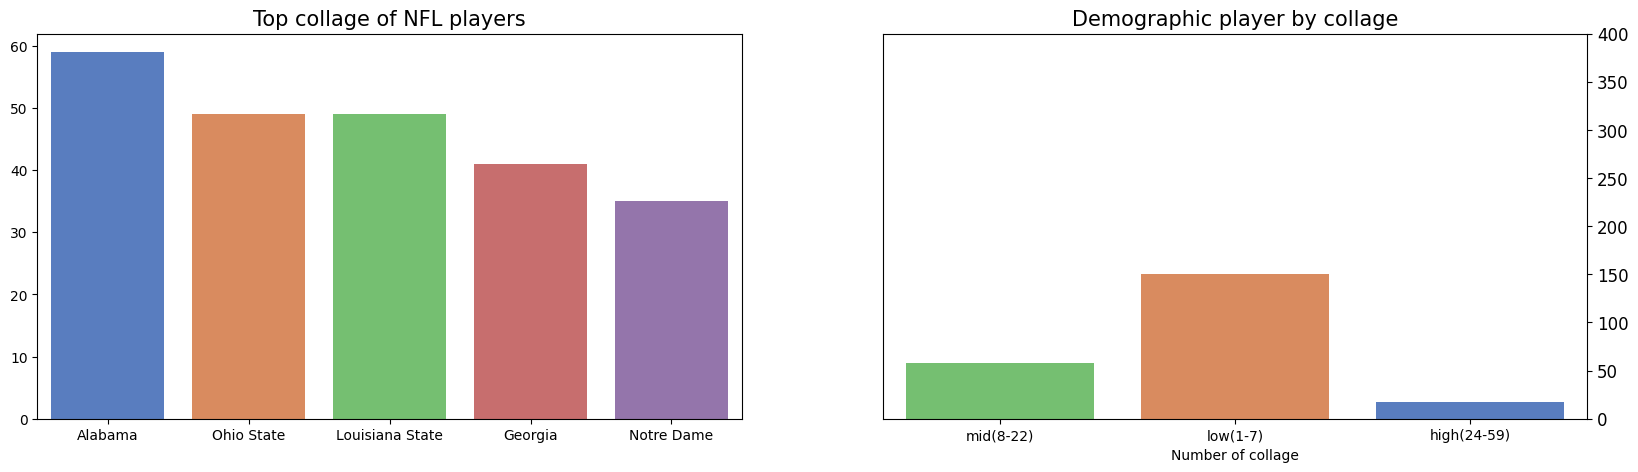

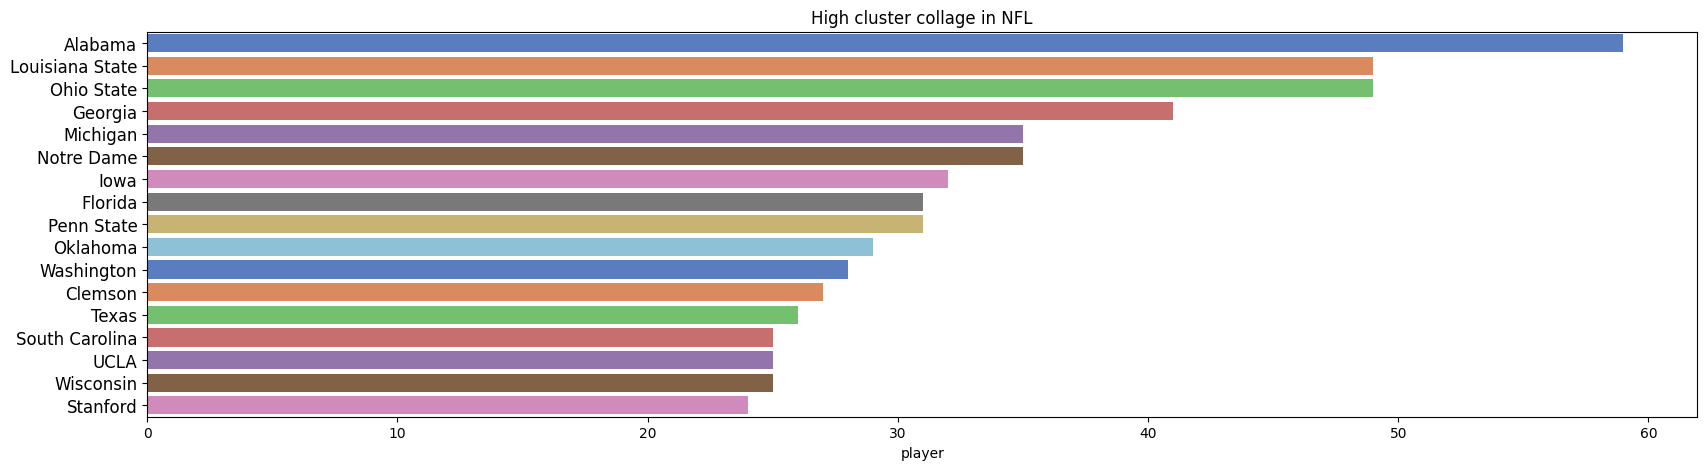

In [42]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x='collegeName', y='player', data=collageName_df.sort_values(by='player', ascending=False).head(5), palette='muted', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Top collage of NFL players', loc='center', fontsize=15)
#ax[0].set_ylim(0, 400)
ax[0].tick_params(axis ='y', labelsize=10)

sns.barplot(x='cluster', y='count', data=cluster_collageName_df, palette='muted', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('Number of collage')
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_ylim(0, 400)
ax[1].set_title('Demographic player by collage', loc='center', fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
fig.savefig('fig5.png')

data1 = collageName_df['cluster']=='high(24-59)'
fig, ax =plt.subplots(figsize=(20, 5))
sns.barplot(x='player', y='collegeName', data=collageName_df[collageName_df['cluster']=='high(24-59)'].sort_values(by='player', ascending=0), palette='muted', ax=ax)
ax.set_ylabel(None)
ax.set_xlabel('player')
ax.set_title("High cluster collage in NFL")
ax.tick_params(axis='y', labelsize=12)
plt.show()
fig.savefig('fig6.png')

**Question collegeName**:
* College with top and bottom number of NFL player
* Demographic collage of member NFL player
* High cluster collage in NFL

### position

In [43]:
position_players_df = players_df.groupby(by='position').nflId.nunique().sort_values(ascending=0).reset_index()
position_players_df.rename(columns={
    'nflId': 'player'
}, inplace=1)
position_players_df

,position,player
0,WR,224
1,CB,189
2,OLB,135
3,DE,131
4,RB,126
5,TE,123
6,DT,121
7,T,117
8,G,107
9,ILB,93


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster centers : [[114.66666667]
 [ 31.5       ]
 [206.5       ]]


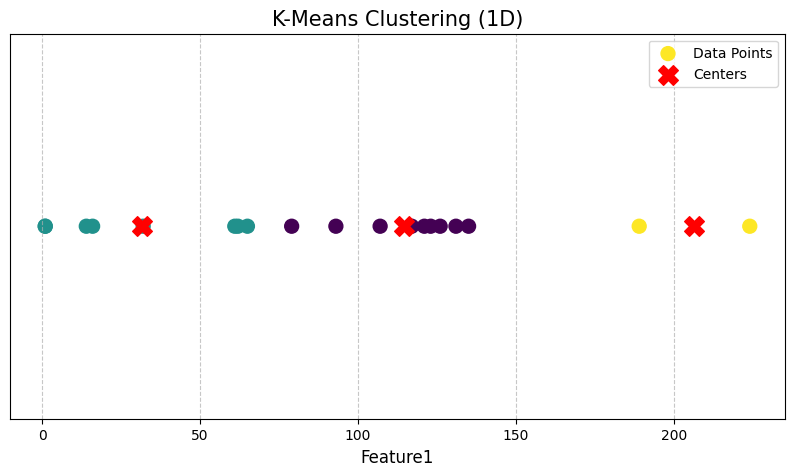

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=3, random_state=42)

position_players_df['position_cluster'] = kmeans.fit_predict(position_players_df[['player']])

centers = kmeans.cluster_centers_

print(f"cluster centers : {centers}")

plt.figure(figsize=(10, 5))
plt.scatter(position_players_df['player'], [0] * len(position_players_df), c=position_players_df['position_cluster'], cmap='viridis', label='Data Points', s=100)
plt.scatter(centers, [0] * len(centers), c='red', marker='X', label='Centers', s=200)
plt.title('K-Means Clustering (1D)', fontsize=15)
plt.xlabel('Feature1', fontsize=12)
plt.yticks([])  # Remove y-axis ticks as it's a 1D visualization
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [45]:
position_players_df

,position,player,position_cluster
0,WR,224,2
1,CB,189,2
2,OLB,135,0
3,DE,131,0
4,RB,126,0
5,TE,123,0
6,DT,121,0
7,T,117,0
8,G,107,0
9,ILB,93,0


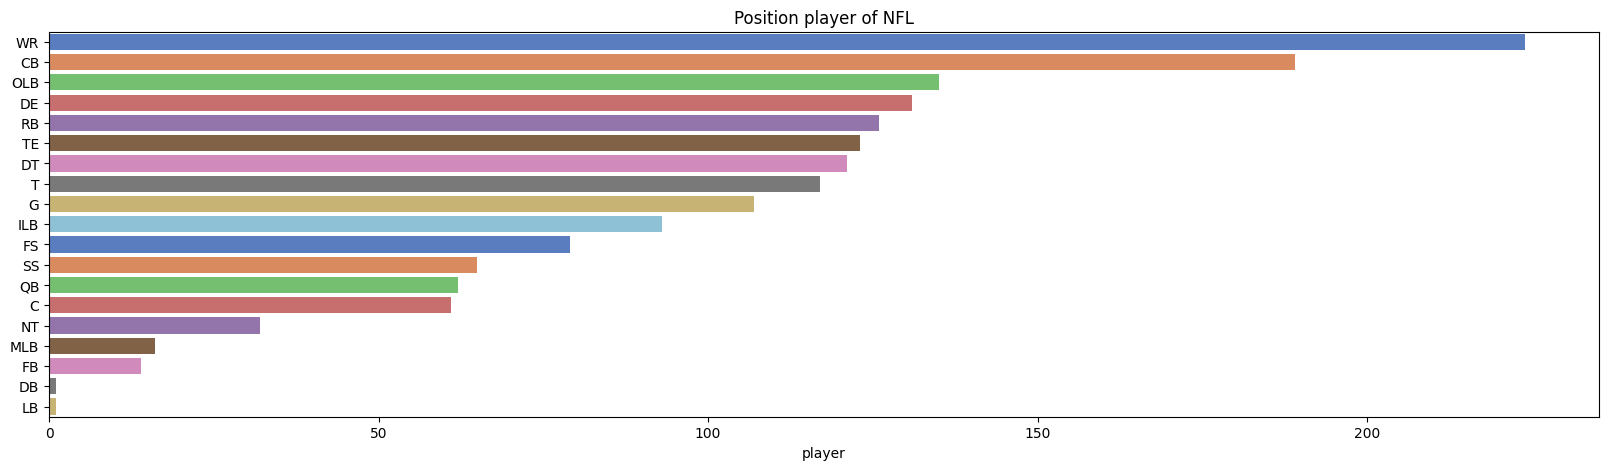

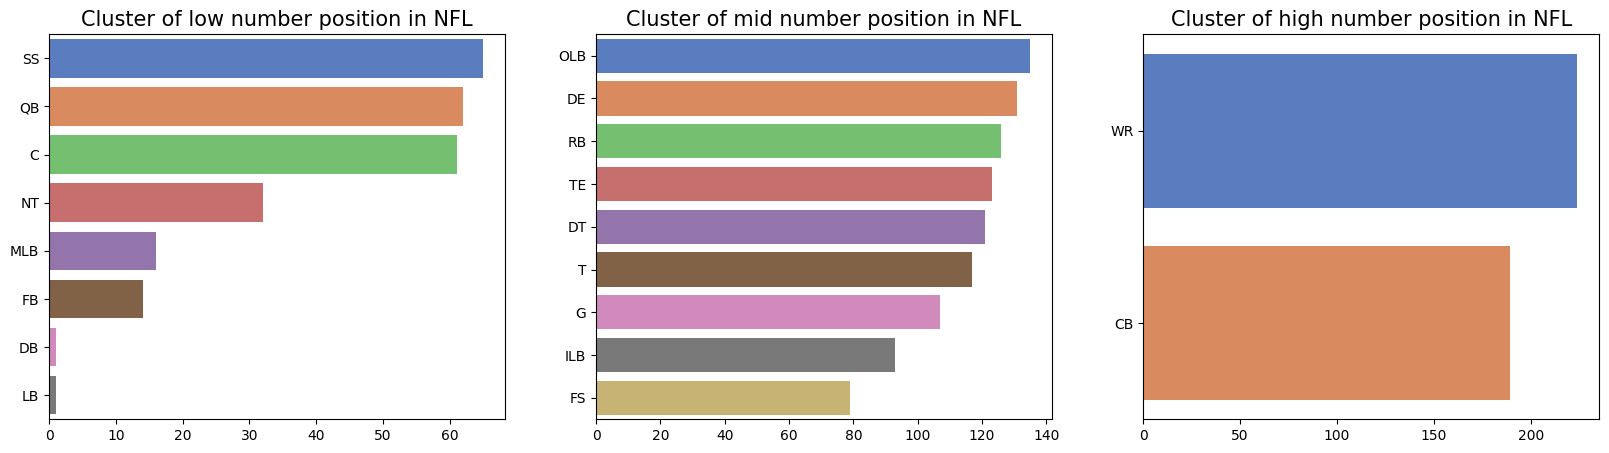

In [46]:
fig, ax =plt.subplots(figsize=(20, 5))
sns.barplot(x='player', y='position', data=position_players_df.sort_values(by='player', ascending=0), palette='muted', ax=ax)#, width=1, hue='position_cluster')
ax.set_ylabel(None)
ax.set_xlabel('player')
ax.set_title("Position player of NFL")
ax.tick_params(axis='y', labelsize=10)
fig.savefig('fig7.png')

fig, ax =plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

#sns.barplot(x='player', y='collegeName', data=collageName_df[collageName_df['cluster']=='high(24-59)'].sort_values(by='player', ascending=0), palette='muted', ax=ax)
sns.barplot(x='player', y='position', data=position_players_df[position_players_df['position_cluster']==1], palette='muted', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Cluster of low number position in NFL', loc='center', fontsize=15)
ax[0].tick_params(axis ='y', labelsize=10)

sns.barplot(x='player', y='position', data=position_players_df[position_players_df['position_cluster']==0], palette='muted', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('Cluster of mid number position in NFL', loc='center', fontsize=15)
ax[1].tick_params(axis ='y', labelsize=10)


sns.barplot(x='player', y='position', data=position_players_df[position_players_df['position_cluster']==2], palette='muted', ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
#ax[2].invert_xaxis()
#ax[2].yaxis.set_label_position('right')
#ax[2].yaxis.tick_right()
#ax[2].set_ylim(0, 400)
ax[2].set_title('Cluster of high number position in NFL', loc='center', fontsize=15)
ax[2].tick_params(axis='y', labelsize=10)
plt.show()
fig.savefig('fig8.png')

**Question position**:
* demographic position players

### age

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster centers : [[30.70015982]
 [27.564503  ]
 [34.75224083]]


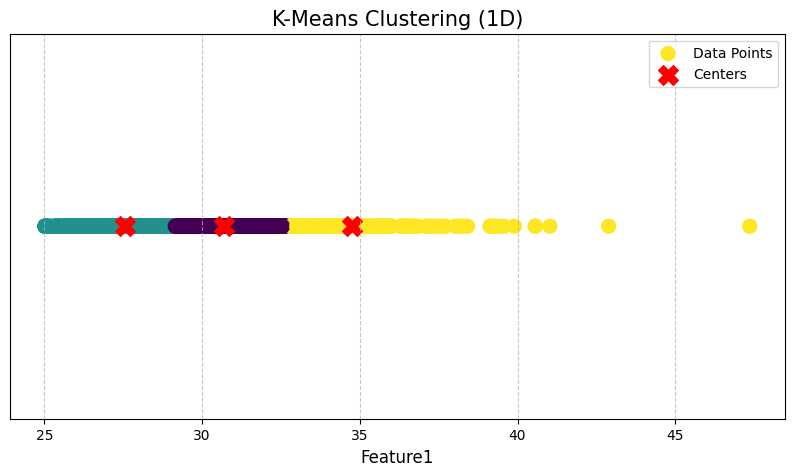

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=3, random_state=42)

players_df['age_cluster'] = kmeans.fit_predict(players_df[['age']])

centers = kmeans.cluster_centers_

print(f"cluster centers : {centers}")

plt.figure(figsize=(10, 5))
plt.scatter(players_df['age'], [0] * len(players_df), c=players_df['age_cluster'], cmap='viridis', label='Data Points', s=100)
plt.scatter(centers, [0] * len(centers), c='red', marker='X', label='Centers', s=200)
plt.title('K-Means Clustering (1D)', fontsize=15)
plt.xlabel('Feature1', fontsize=12)
plt.yticks([])  # Remove y-axis ticks as it's a 1D visualization
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [48]:
players_df['age_category'] = players_df.apply(
    lambda row: 'rookie' if row['age_cluster'] == 1 else 'prime' if row['age_cluster'] == 0 else 'veteran', axis=1
)
players_df

,nflId,height,weight,birthDate,collegeName,position,displayName,age,heightCm,height_cluster,weight_cluster,age_cluster,age_category
0,25511,6-4,225,1977-08-03 00:00:00.000000,Michigan,QB,Tom Brady,47.361644,193.04,193.04-205.74,224-278,2,veteran
1,29550,6-4,328,1982-01-22 00:00:00.000000,Arkansas,T,Jason Peters,42.887671,193.04,193.04-205.74,279-380,2,veteran
2,29851,6-2,225,1983-12-02 00:00:00.000000,California,QB,Aaron Rodgers,41.027397,187.96,185.42-190.50,224-278,2,veteran
3,30842,6-6,267,1984-05-19 00:00:00.000000,UCLA,TE,Marcedes Lewis,40.564384,198.12,193.04-205.74,224-278,2,veteran
4,33084,6-4,217,1985-05-17 00:00:00.000000,Boston College,QB,Matt Ryan,39.569863,193.04,193.04-205.74,153-223,2,veteran
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,55190,6-1,285,1999-06-19 03:18:12.561290,Maryland,DE,Sam Okuayinonu,25.471233,185.42,185.42-190.50,279-380,1,rookie
1693,55200,6-6,266,1994-06-19 22:29:50.681605,Indiana,DT,Ryder Anderson,30.473973,198.12,193.04-205.74,224-278,0,prime
1694,55239,6-2,300,1997-02-11 20:38:56.787287,Pennsylvania,DT,Prince Emili,27.821918,187.96,185.42-190.50,279-380,1,rookie
1695,55240,6-1,185,1998-12-15 09:20:05.924175,Buffalo,CB,Ja'Marcus Ingram,25.980822,185.42,185.42-190.50,153-223,1,rookie


In [49]:
age_players_df = players_df.groupby(by='age_category').agg({
    'age': ['min', 'max', 'count'],
})
age_players_df = age_players_df['age'].reset_index()
age_players_df

,age_category,min,max,count
0,prime,29.136986,32.712329,719
1,rookie,25.030137,29.128767,735
2,veteran,32.728767,47.361644,243


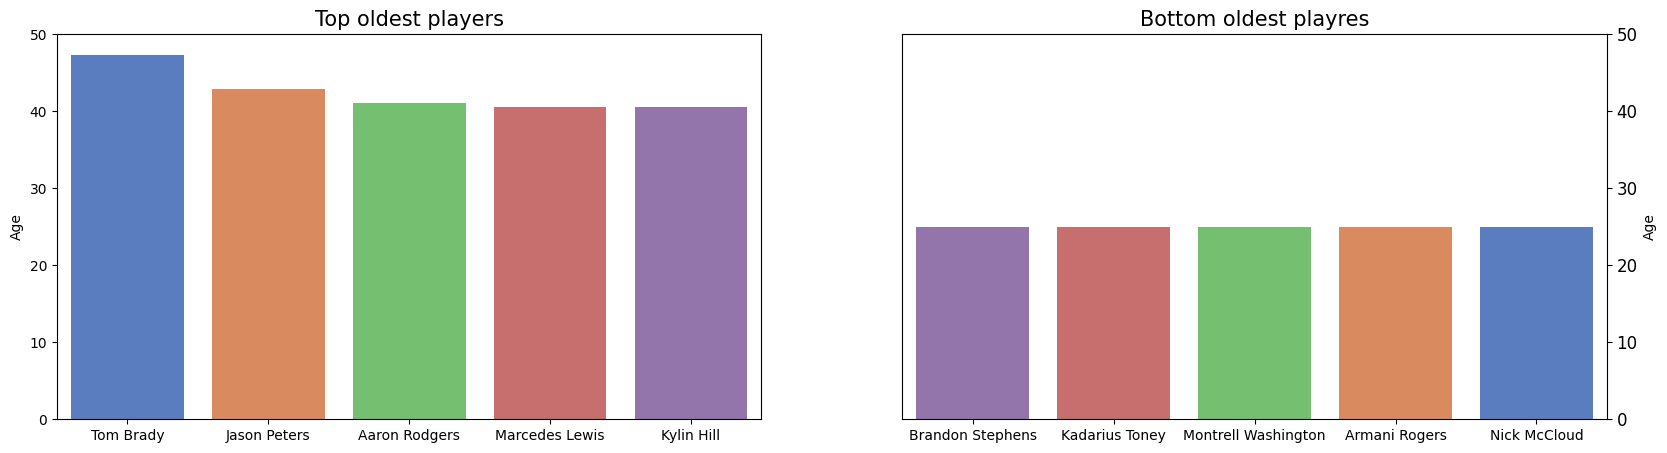

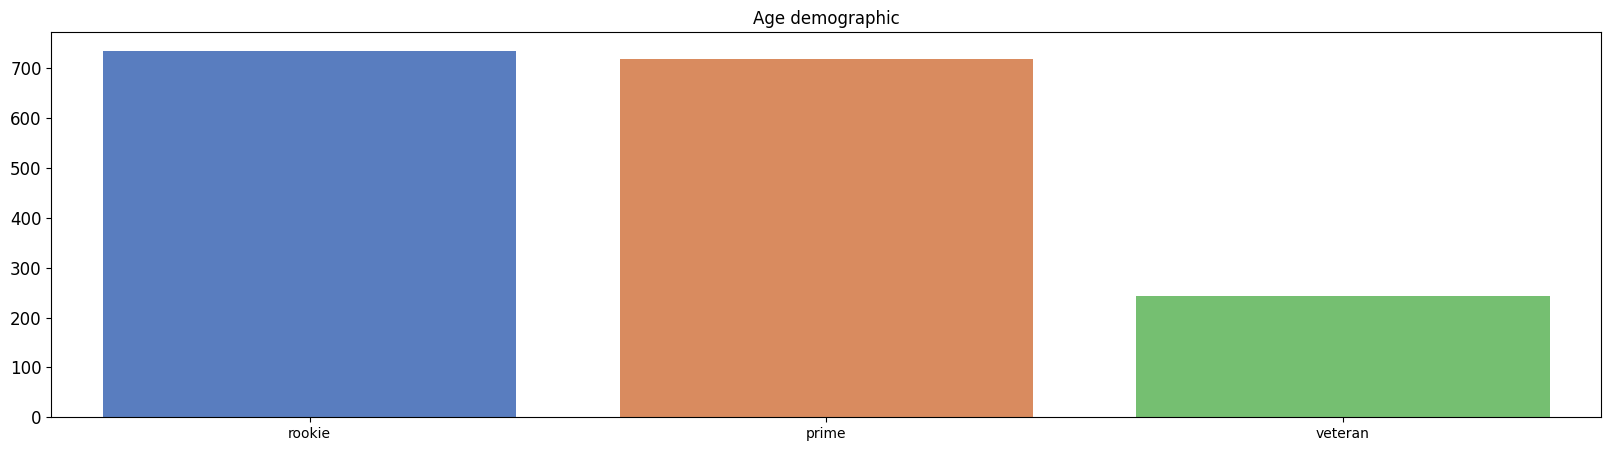

In [50]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x='displayName', y='age', data=players_df.sort_values(by='age', ascending=False).head(5), palette='muted', ax=ax[0])
ax[0].set_ylabel("Age")
ax[0].set_xlabel(None)
ax[0].set_title('Top oldest players', loc='center', fontsize=15)
ax[0].set_ylim(0, 50)
ax[0].tick_params(axis ='y', labelsize=10)

sns.barplot(x='displayName', y='age', data=players_df.sort_values(by='age', ascending=True).head(5), palette='muted', ax=ax[1])
ax[1].set_ylabel('Age')
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_ylim(0, 50)
ax[1].set_title('Bottom oldest playres', loc='center', fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
fig.savefig('fig9.png')


fig, ax =plt.subplots(figsize=(20, 5))
sns.barplot(x='age_category', y='count', data=age_players_df.sort_values(by='min', ascending=1), palette='muted', ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Age demographic")
ax.tick_params(axis='y', labelsize=12)
plt.show()
fig.savefig('fig10.png')

**Question age**:
* demographic player by age cluster
* 5 oldest and youngest player

### cross columns

**Analysis question**:
* Pemain-peman tinggi kebanyakan berasal dari kampus mana?
* corelation of each columns and dig insight from that

In [51]:
players_df

,nflId,height,weight,birthDate,collegeName,position,displayName,age,heightCm,height_cluster,weight_cluster,age_cluster,age_category
0,25511,6-4,225,1977-08-03 00:00:00.000000,Michigan,QB,Tom Brady,47.361644,193.04,193.04-205.74,224-278,2,veteran
1,29550,6-4,328,1982-01-22 00:00:00.000000,Arkansas,T,Jason Peters,42.887671,193.04,193.04-205.74,279-380,2,veteran
2,29851,6-2,225,1983-12-02 00:00:00.000000,California,QB,Aaron Rodgers,41.027397,187.96,185.42-190.50,224-278,2,veteran
3,30842,6-6,267,1984-05-19 00:00:00.000000,UCLA,TE,Marcedes Lewis,40.564384,198.12,193.04-205.74,224-278,2,veteran
4,33084,6-4,217,1985-05-17 00:00:00.000000,Boston College,QB,Matt Ryan,39.569863,193.04,193.04-205.74,153-223,2,veteran
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,55190,6-1,285,1999-06-19 03:18:12.561290,Maryland,DE,Sam Okuayinonu,25.471233,185.42,185.42-190.50,279-380,1,rookie
1693,55200,6-6,266,1994-06-19 22:29:50.681605,Indiana,DT,Ryder Anderson,30.473973,198.12,193.04-205.74,224-278,0,prime
1694,55239,6-2,300,1997-02-11 20:38:56.787287,Pennsylvania,DT,Prince Emili,27.821918,187.96,185.42-190.50,279-380,1,rookie
1695,55240,6-1,185,1998-12-15 09:20:05.924175,Buffalo,CB,Ja'Marcus Ingram,25.980822,185.42,185.42-190.50,153-223,1,rookie


In [52]:
from sklearn.preprocessing import LabelEncoder
le_collegeName = LabelEncoder()
players_df['collegeNameLab'] = le_collegeName.fit_transform(players_df['collegeName'])

le_position = LabelEncoder()
players_df['positionLab'] = le_collegeName.fit_transform(players_df['position'])

le_position = LabelEncoder()
players_df['displayNameLab'] = le_collegeName.fit_transform(players_df['displayName'])

In [53]:
a = players_df[['nflId', 'weight', 'collegeName', 'position', 'displayName', 'age', 'heightCm']]
b = players_df[['nflId', 'weight', 'age', 'heightCm', 'collegeNameLab', 'positionLab', 'displayNameLab']]

correlation = b.corr()

In [54]:
print(correlation)

                   nflId    weight       age  heightCm  collegeNameLab  \
nflId           1.000000 -0.089592 -0.541191 -0.003305        0.000068   
weight         -0.089592  1.000000  0.074463  0.706017        0.002015   
age            -0.541191  0.074463  1.000000  0.044220       -0.016098   
heightCm       -0.003305  0.706017  0.044220  1.000000        0.004689   
collegeNameLab  0.000068  0.002015 -0.016098  0.004689        1.000000   
positionLab     0.000993 -0.168731  0.004464  0.030583        0.008660   
displayNameLab  0.025425 -0.000773 -0.005336  0.000588        0.013613   

                positionLab  displayNameLab  
nflId              0.000993        0.025425  
weight            -0.168731       -0.000773  
age                0.004464       -0.005336  
heightCm           0.030583        0.000588  
collegeNameLab     0.008660        0.013613  
positionLab        1.000000        0.041691  
displayNameLab     0.041691        1.000000  


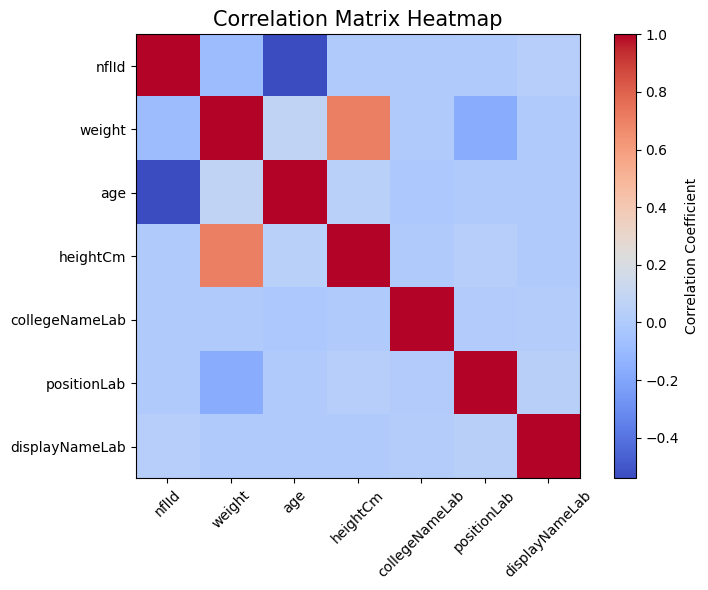

In [55]:
plt.figure(figsize=(8, 6))
plt.imshow(correlation, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Matrix Heatmap', fontsize=15)
plt.xticks(range(len(correlation)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation)), correlation.columns)
plt.tight_layout()

plt.savefig('fig11.png')

Correlation between [heightCm] and [weight] is 0.706017, other than that there is no siginifocant correlation.

# Summary

**Question heightCm**:
* Top 5 highest and lowest players
* demographic by height cluster

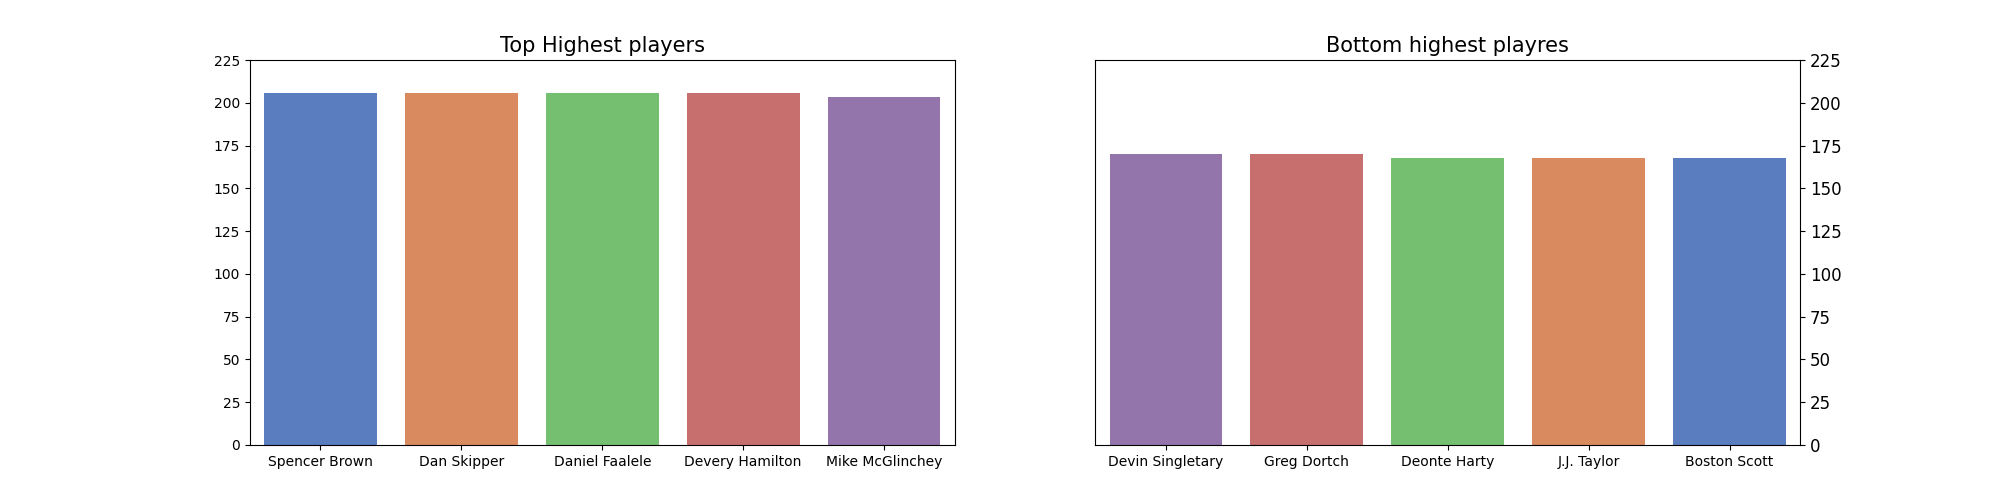

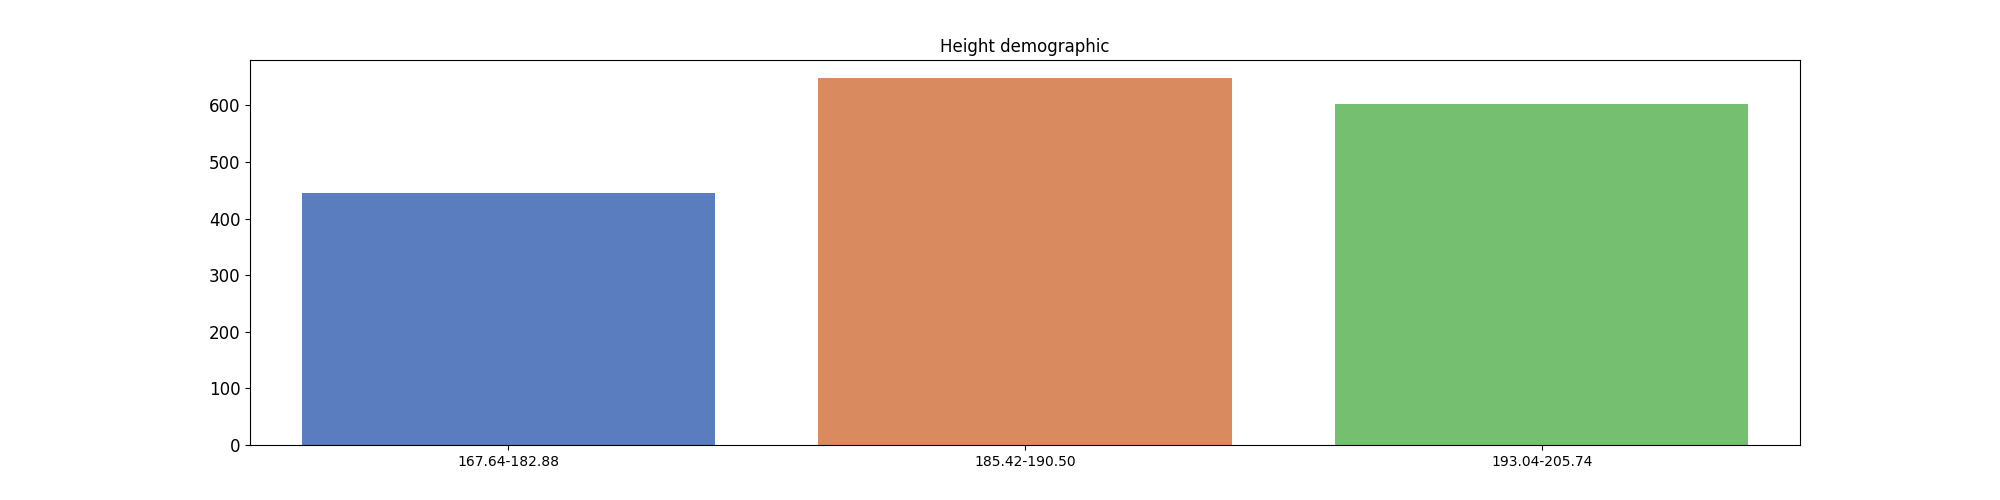

In [56]:
display(Image('fig1.png'))
display(Image('fig2.png'))

**Question weight**:
* 5 top and bottom weight player
* Demographic by weight cluster

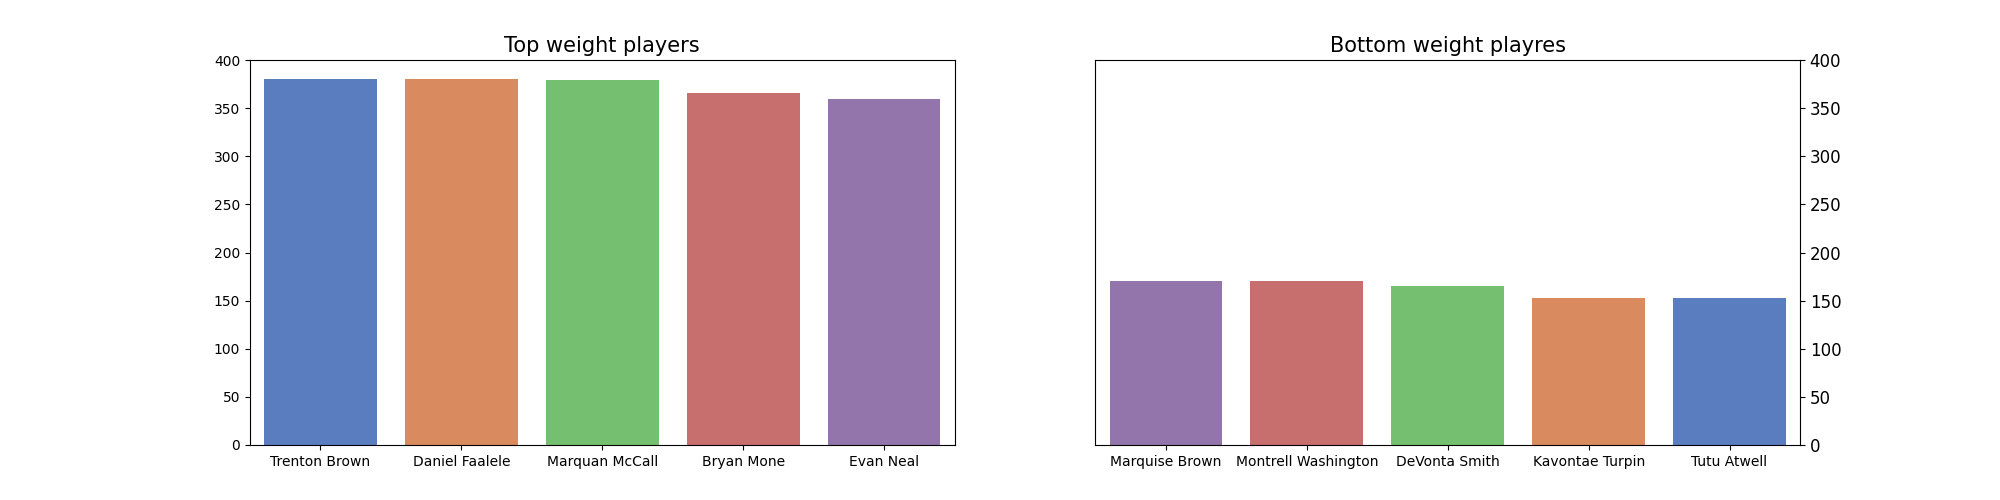

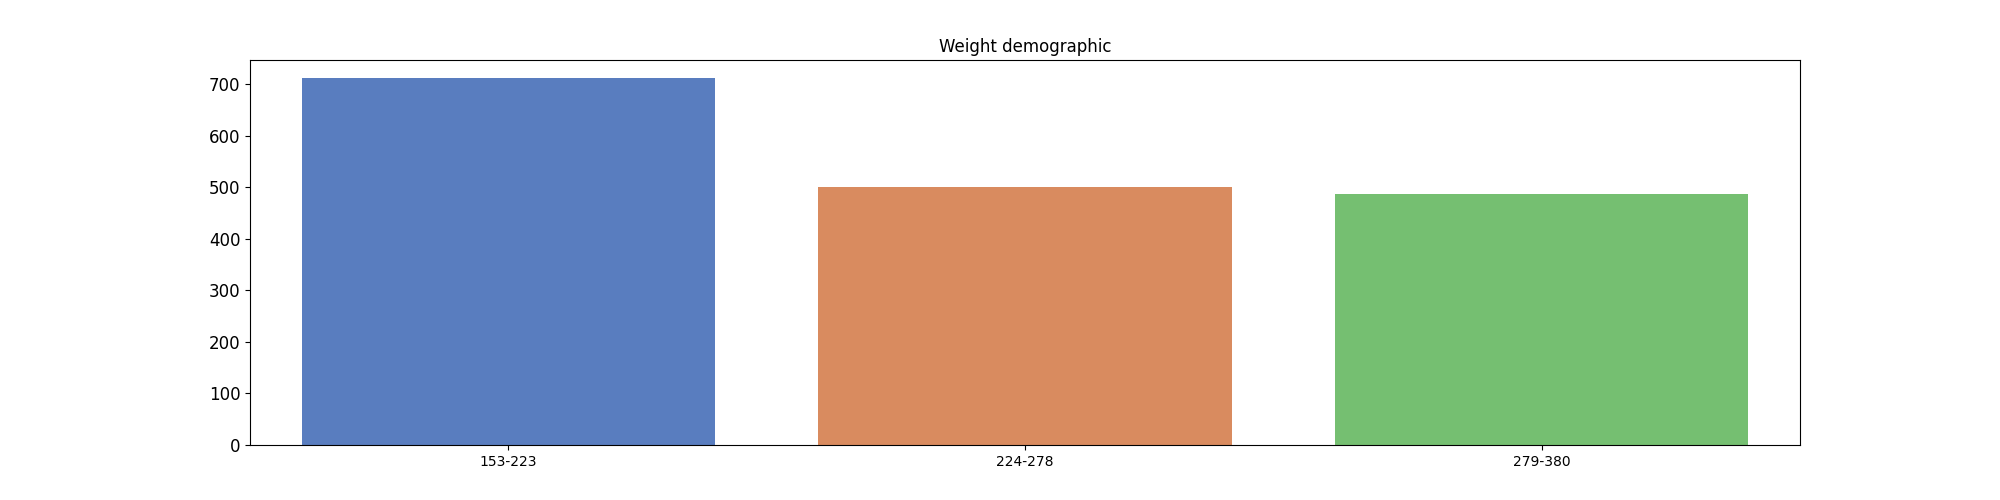

In [57]:
display(Image('fig3.png'))
display(Image('fig4.png'))

**Question collegeName**:
* College with top and bottom number of NFL player

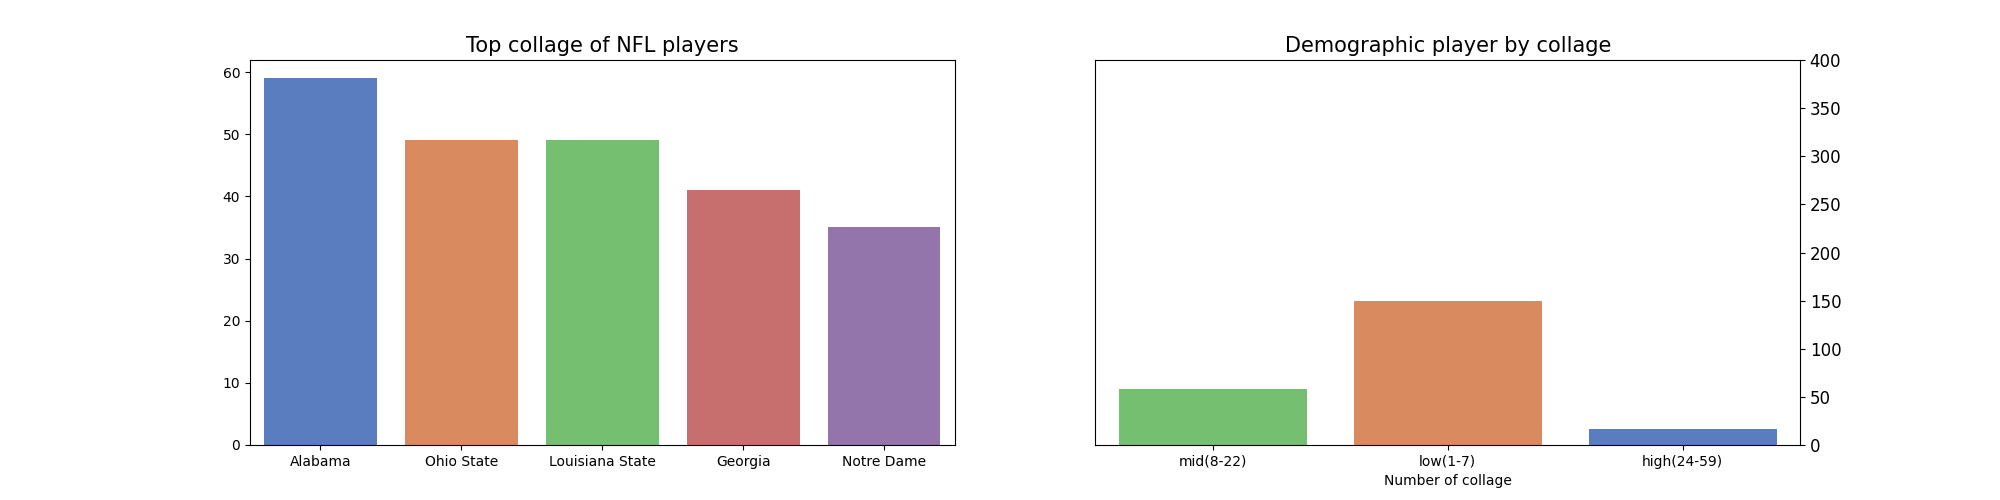

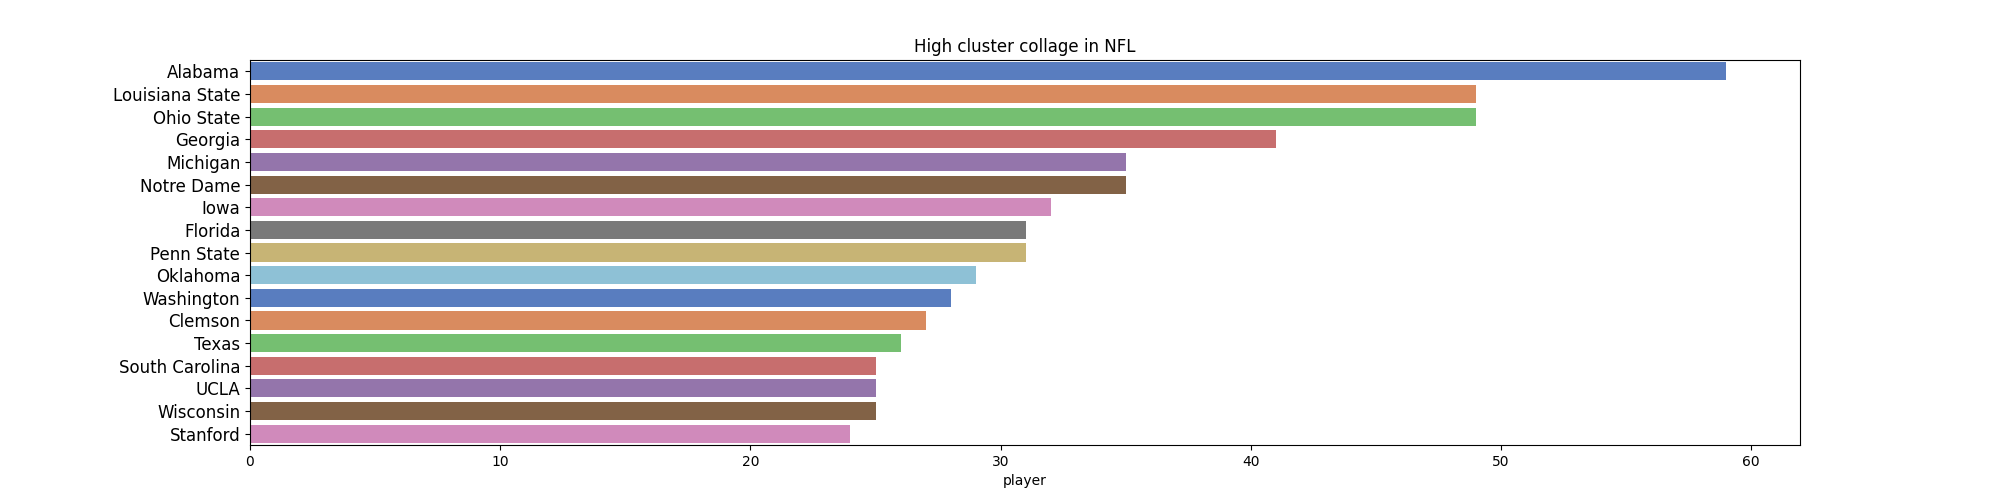

In [58]:
display(Image('fig5.png'))
display(Image('fig6.png'))

**Question position**:
* demographic position players

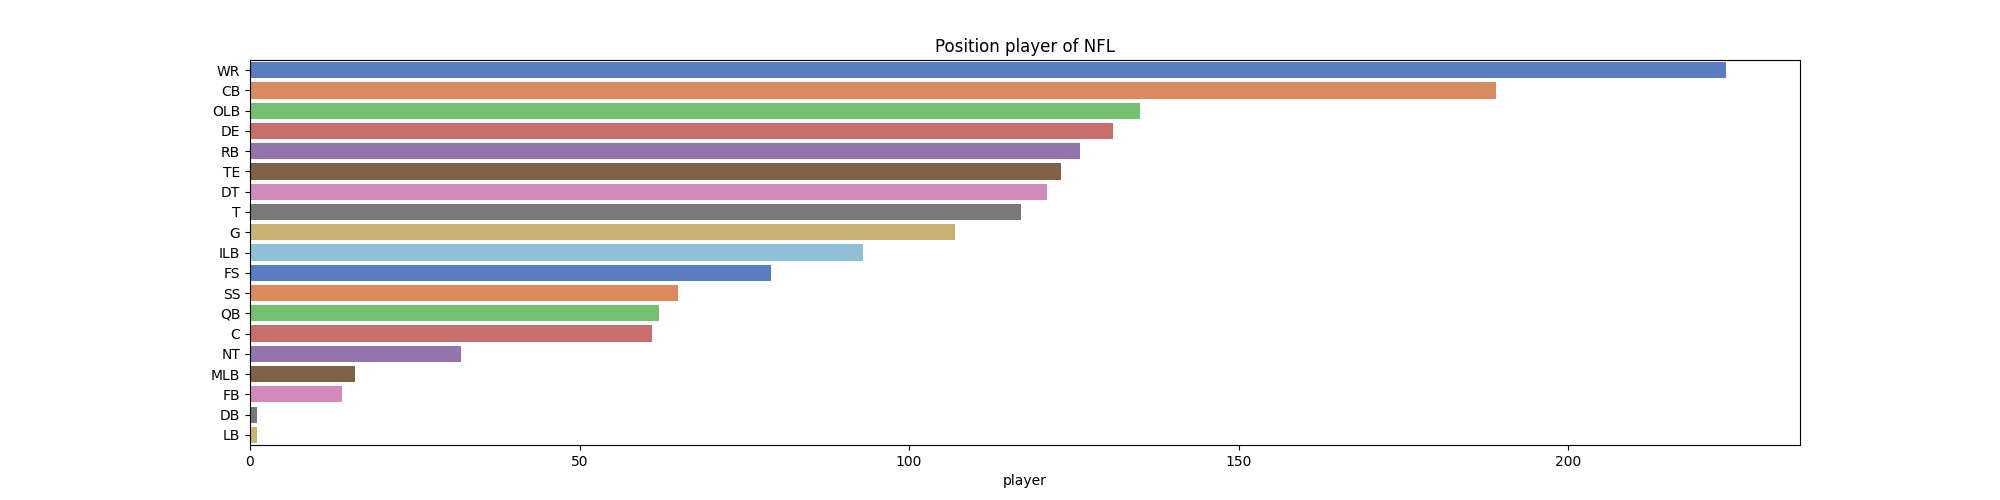

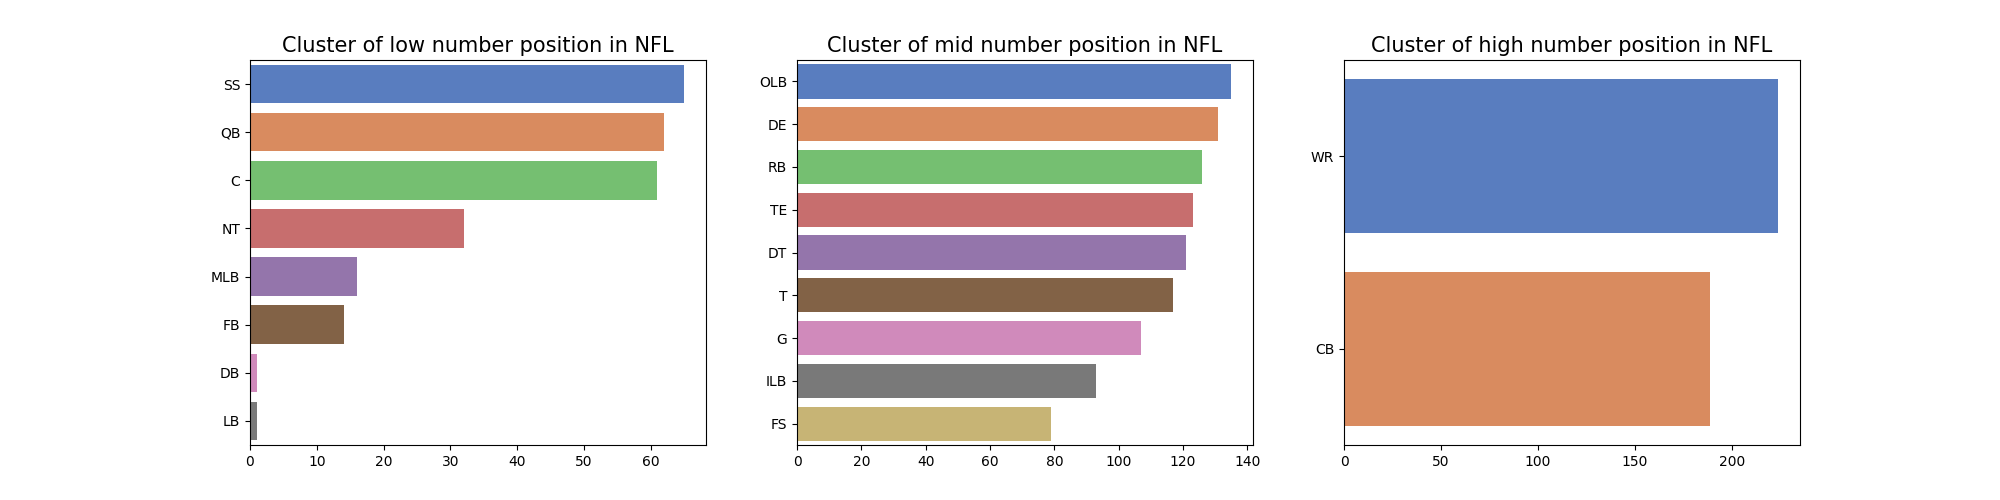

In [59]:
display(Image('fig7.png'))
display(Image('fig8.png'))

**Question age**:
* demographic player by age cluster
* 5 oldest and youngest player

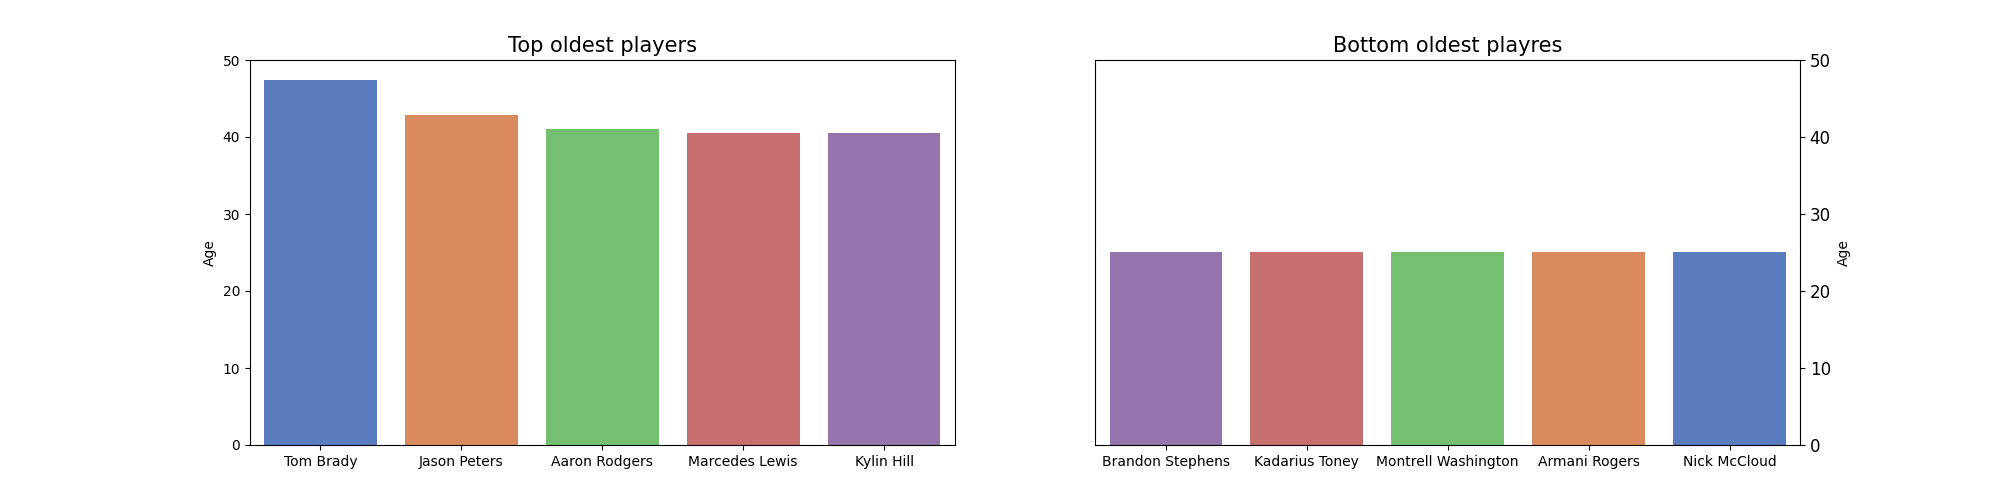

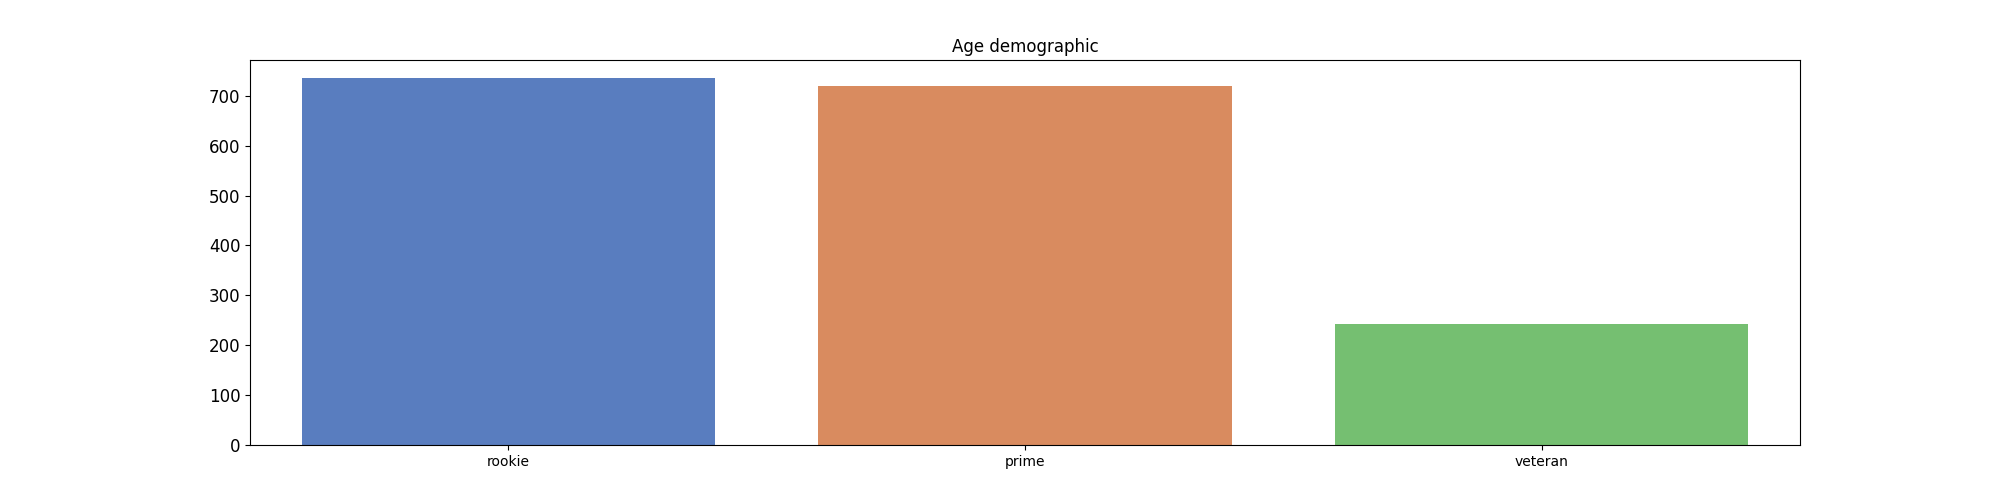

In [60]:
display(Image('fig9.png'))
display(Image('fig10.png'))

**Analysis question**:
* corelation of each columns and dig insight from that

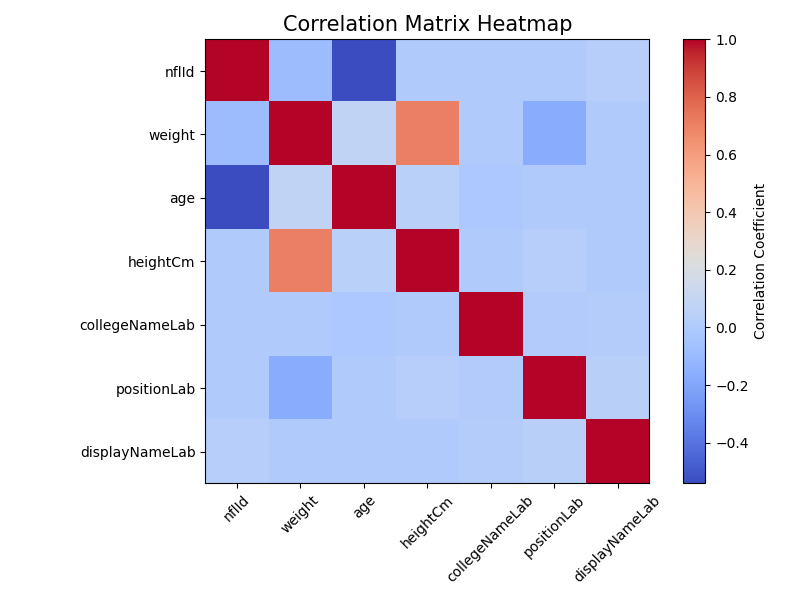

In [61]:
display(Image('fig11.png'))